# Setup Paths

In [1]:
#path to the data
# pathCOMPASOutput =   '/Volumes/Virgo/DATA/BHNS/Fiducial/'

pathCOMPASOutput='/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial/'

# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py  as h5
import gc
#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#custom imports
import coencodeVarious as CV
import ClassCOMPAS     as CC
import ClassFormationChannels as FC

from PostProcessingScripts import * 

# General idea

Previous versions of the data reduction for this paper show more precise data reduction steps.
Since we are only interested in DCOs there are only few settings that I have preset in 
the ClassCOMPASData.

This notebook is focussed on plotting some of the distributions of our populations of DCOs
that are of interest for the cosmic integration.
Because of the MSSFR, we want to look at different metallicities and delay times.
Because we care about detecting the events we want mass and mass ratio distributions
Because we want rates we want yield of DCO per solar mass of star formation.



In [3]:
#For consistency between al the plots I predefine the colours and labels here

#Colours and DCO types
Types      = ['BBH', 'BHNS', 'BNS']
Colours    = ['midnightblue','mediumaquamarine','mediumvioletred' ]

#Metallicities of interest and transparency colour
solar = 0.0142
indZ  = np.array([14,17,22,25]) #looked up earlier
#roughly a tenth - fifth - half - and solar metallicities
alphas     = [1. ,0.65, 0.4, 0.25]

# Yield per Z and formation channels

Already from the notebook 1_formationChannels we know how to get the formation
channels of a given DCO population. Here we quickly redo the calculation so we have the seeds.
But we use the already grouped indices of the sorted Ranks. These groups are for formation channels
that are similar except for type of Donor/accretor at the moment of RLOF. Although this will matter
for future research (is CHeB MT stable?), for now it is outside the scope. 

In [4]:


#Set up and do formation channels, so I can get the seeds
fc = FC.FormationChannels(path = pathCOMPASOutput)
fc.formationChannelsSeeds(types='BHNS', withinHubbleTime=True, optimistic=False)
#Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=False)
Data.setCOMPASData()
SeedsHubble    = Data.seeds[Data.Hubble==True]

(23174.234060106555, 'sum sorted counts')
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


In [ ]:
# dictRank = {'no Interaction':[0],    'non CEE Channel':[1,6,7],\
#             'Classic Channel':[2,5], 'single stable MT':[3,4,10],\
#             'double Core CEE':[8],   'no CEE':[9],\
#             'fortunate Kick 1MT':[11]}
# dictRank = {'non CEE Channel':[0], 'Classic Channel':[1,2],'double Core CEE':[3]}


# # total simulation all Metallicities (have to double check when adding other metallicities)
# dictChannelsBHNS = {'classic CaseB':[2,3,4,5,6,21,23,27,29,33], 'classic caseA':[1,7,8,12,24,28,35,47,49], \
#                 'double core CE':[9,10,14,31,34,44], 'unstable caseC':[13,18,26,30,36,40,41,45,46,48], \
#                  'no CEE':[15,17,42],'caseA rejuvenation':[16,19],\
#                     'classic caseC':[11,20,22,25,32,37,38,39,43]}



# dictChannelsNSorBHfirst= {'BH-NS':[2,3,6,10,11,13,14,15,17,18,20,21,22,23,25,26,27], 'NS-BH':[1,4,5,7,8,9,12,16,19,24]}





In [ ]:
# dictChannelsBHNSList = ['stable A', \
#                      'stable B', 'stable C', 'stable B no CEE', \
#                     'case B immediate CE',\
#                     r'case C immediate CE', \
#                  r'double-core CE', 'other']

In [ ]:
# #Only want the three most important channels,
# #create empty lists to fill with seeds
# ChannelSeeds   = [[], [], [], [],[],[],[],[]]
# # ChannelLabels  = ['classic CaseB', 'classic caseA', \
# #                 'double core CE', 'unstable caseC', 'no CEE', \
# #                'caseA rejuvenation', 'classic caseC']
# for nrL, label in enumerate(dictRankBHNSList):
#     for index in dictRankBHNS[label]:
#         #give me the seeds of channel and mask only the ones merging within hubble
#         seedsInterest = fc.sortedSeeds[index]
#         seedsInterest = seedsInterest[np.in1d(seedsInterest,SeedsHubble)]
#         ChannelSeeds[nrL].extend(seedsInterest)
# #Rename and define colours for plotting
# ChannelLabels  = ['Channel I', 'Channel II', 'Channel III']
# ChannelColours = ['lightgray', 'darkgray', 'gray']

# #Got my seeds labels etc so clear up and free memory
# del fc
# del Data
# del SeedsHubble
# del seedsInterest
# gc.collect()

In [ ]:


# dictRankBHNSList = ['classic CaseB', 'classic caseA', \
#                 'double core CE', 'unstable caseC', 'no CEE', \
#                'caseA rejuvenation', 'classic caseC']

# for nrC, Channel in enumerate(dictRankBHNSList):
#     print nrC, Channel
    

In [4]:
from scipy.spatial.distance import cdist

class gaussian_kde(object):
    """Representation of a kernel-density estimate using Gaussian kernels.

    Kernel density estimation is a way to estimate the probability density
    function (PDF) of a random variable in a non-parametric way.
    `gaussian_kde` works for both uni-variate and multi-variate data.   It
    includes automatic bandwidth determination.  The estimation works best for
    a unimodal distribution; bimodal or multi-modal distributions tend to be
    oversmoothed.

    Parameters
    ----------
    dataset : array_like
        Datapoints to estimate from. In case of univariate data this is a 1-D
        array, otherwise a 2-D array with shape (# of dims, # of data).
    bw_method : str, scalar or callable, optional
        The method used to calculate the estimator bandwidth.  This can be
        'scott', 'silverman', a scalar constant or a callable.  If a scalar,
        this will be used directly as `kde.factor`.  If a callable, it should
        take a `gaussian_kde` instance as only parameter and return a scalar.
        If None (default), 'scott' is used.  See Notes for more details.
    weights : array_like, shape (n, ), optional, default: None
        An array of weights, of the same shape as `x`.  Each value in `x`
        only contributes its associated weight towards the bin count
        (instead of 1).

    Attributes
    ----------
    dataset : ndarray
        The dataset with which `gaussian_kde` was initialized.
    d : int
        Number of dimensions.
    n : int
        Number of datapoints.
    neff : float
        Effective sample size using Kish's approximation.
    factor : float
        The bandwidth factor, obtained from `kde.covariance_factor`, with which
        the covariance matrix is multiplied.
    covariance : ndarray
        The covariance matrix of `dataset`, scaled by the calculated bandwidth
        (`kde.factor`).
    inv_cov : ndarray
        The inverse of `covariance`.

    Methods
    -------
    kde.evaluate(points) : ndarray
        Evaluate the estimated pdf on a provided set of points.
    kde(points) : ndarray
        Same as kde.evaluate(points)
    kde.pdf(points) : ndarray
        Alias for ``kde.evaluate(points)``.
    kde.set_bandwidth(bw_method='scott') : None
        Computes the bandwidth, i.e. the coefficient that multiplies the data
        covariance matrix to obtain the kernel covariance matrix.
        .. versionadded:: 0.11.0
    kde.covariance_factor : float
        Computes the coefficient (`kde.factor`) that multiplies the data
        covariance matrix to obtain the kernel covariance matrix.
        The default is `scotts_factor`.  A subclass can overwrite this method
        to provide a different method, or set it through a call to
        `kde.set_bandwidth`.

    Notes
    -----
    Bandwidth selection strongly influences the estimate obtained from the KDE
    (much more so than the actual shape of the kernel).  Bandwidth selection
    can be done by a "rule of thumb", by cross-validation, by "plug-in
    methods" or by other means; see [3]_, [4]_ for reviews.  `gaussian_kde`
    uses a rule of thumb, the default is Scott's Rule.

    Scott's Rule [1]_, implemented as `scotts_factor`, is::

        n**(-1./(d+4)),

    with ``n`` the number of data points and ``d`` the number of dimensions.
    Silverman's Rule [2]_, implemented as `silverman_factor`, is::

        (n * (d + 2) / 4.)**(-1. / (d + 4)).

    Good general descriptions of kernel density estimation can be found in [1]_
    and [2]_, the mathematics for this multi-dimensional implementation can be
    found in [1]_.

    References
    ----------
    .. [1] D.W. Scott, "Multivariate Density Estimation: Theory, Practice, and
           Visualization", John Wiley & Sons, New York, Chicester, 1992.
    .. [2] B.W. Silverman, "Density Estimation for Statistics and Data
           Analysis", Vol. 26, Monographs on Statistics and Applied Probability,
           Chapman and Hall, London, 1986.
    .. [3] B.A. Turlach, "Bandwidth Selection in Kernel Density Estimation: A
           Review", CORE and Institut de Statistique, Vol. 19, pp. 1-33, 1993.
    .. [4] D.M. Bashtannyk and R.J. Hyndman, "Bandwidth selection for kernel
           conditional density estimation", Computational Statistics & Data
           Analysis, Vol. 36, pp. 279-298, 2001.

    Examples
    --------
    Generate some random two-dimensional data:

    >>> from scipy import stats
    >>> def measure(n):
    >>>     "Measurement model, return two coupled measurements."
    >>>     m1 = np.random.normal(size=n)
    >>>     m2 = np.random.normal(scale=0.5, size=n)
    >>>     return m1+m2, m1-m2

    >>> m1, m2 = measure(2000)
    >>> xmin = m1.min()
    >>> xmax = m1.max()
    >>> ymin = m2.min()
    >>> ymax = m2.max()

    Perform a kernel density estimate on the data:

    >>> X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    >>> positions = np.vstack([X.ravel(), Y.ravel()])
    >>> values = np.vstack([m1, m2])
    >>> kernel = stats.gaussian_kde(values)
    >>> Z = np.reshape(kernel(positions).T, X.shape)

    Plot the results:

    >>> import matplotlib.pyplot as plt
    >>> fig = plt.figure()
    >>> ax = fig.add_subplot(111)
    >>> ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
    ...           extent=[xmin, xmax, ymin, ymax])
    >>> ax.plot(m1, m2, 'k.', markersize=2)
    >>> ax.set_xlim([xmin, xmax])
    >>> ax.set_ylim([ymin, ymax])
    >>> plt.show()

    """
    def __init__(self, dataset, bw_method=None, weights=None):
        self.dataset = np.atleast_2d(dataset)
        if not self.dataset.size > 1:
            raise ValueError("`dataset` input should have multiple elements.")
        self.d, self.n = self.dataset.shape
            
        if weights is not None:
            self.weights = weights / np.sum(weights)
        else:
            self.weights = np.ones(self.n) / self.n
            
        # Compute the effective sample size 
        # http://surveyanalysis.org/wiki/Design_Effects_and_Effective_Sample_Size#Kish.27s_approximate_formula_for_computing_effective_sample_size
        self.neff = 1.0 / np.sum(self.weights ** 2)

        self.set_bandwidth(bw_method=bw_method)

    def evaluate(self, points):
        """Evaluate the estimated pdf on a set of points.

        Parameters
        ----------
        points : (# of dimensions, # of points)-array
            Alternatively, a (# of dimensions,) vector can be passed in and
            treated as a single point.

        Returns
        -------
        values : (# of points,)-array
            The values at each point.

        Raises
        ------
        ValueError : if the dimensionality of the input points is different than
                     the dimensionality of the KDE.

        """
        points = np.atleast_2d(points)

        d, m = points.shape
        if d != self.d:
            if d == 1 and m == self.d:
                # points was passed in as a row vector
                points = np.reshape(points, (self.d, 1))
                m = 1
            else:
                msg = "points have dimension %s, dataset has dimension %s" % (d,
                    self.d)
                raise ValueError(msg)

        # compute the normalised residuals
        chi2 = cdist(points.T, self.dataset.T, 'mahalanobis', VI=self.inv_cov) ** 2
        # compute the pdf
        result = np.sum(np.exp(-.5 * chi2) * self.weights, axis=1) / self._norm_factor

        return result

    __call__ = evaluate

    def scotts_factor(self):
        return np.power(self.neff, -1./(self.d+4))

    def silverman_factor(self):
        return np.power(self.neff*(self.d+2.0)/4.0, -1./(self.d+4))

    #  Default method to calculate bandwidth, can be overwritten by subclass
    covariance_factor = scotts_factor

    def set_bandwidth(self, bw_method=None):
        """Compute the estimator bandwidth with given method.

        The new bandwidth calculated after a call to `set_bandwidth` is used
        for subsequent evaluations of the estimated density.

        Parameters
        ----------
        bw_method : str, scalar or callable, optional
            The method used to calculate the estimator bandwidth.  This can be
            'scott', 'silverman', a scalar constant or a callable.  If a
            scalar, this will be used directly as `kde.factor`.  If a callable,
            it should take a `gaussian_kde` instance as only parameter and
            return a scalar.  If None (default), nothing happens; the current
            `kde.covariance_factor` method is kept.

        Notes
        -----
        .. versionadded:: 0.11

        Examples
        --------
        >>> x1 = np.array([-7, -5, 1, 4, 5.])
        >>> kde = stats.gaussian_kde(x1)
        >>> xs = np.linspace(-10, 10, num=50)
        >>> y1 = kde(xs)
        >>> kde.set_bandwidth(bw_method='silverman')
        >>> y2 = kde(xs)
        >>> kde.set_bandwidth(bw_method=kde.factor / 3.)
        >>> y3 = kde(xs)

        >>> fig = plt.figure()
        >>> ax = fig.add_subplot(111)
        >>> ax.plot(x1, np.ones(x1.shape) / (4. * x1.size), 'bo',
        ...         label='Data points (rescaled)')
        >>> ax.plot(xs, y1, label='Scott (default)')
        >>> ax.plot(xs, y2, label='Silverman')
        >>> ax.plot(xs, y3, label='Const (1/3 * Silverman)')
        >>> ax.legend()
        >>> plt.show()

        """
        if bw_method is None:
            pass
        elif bw_method == 'scott':
            self.covariance_factor = self.scotts_factor
        elif bw_method == 'silverman':
            self.covariance_factor = self.silverman_factor
        elif np.isscalar(bw_method): # and not isinstance(bw_method, string_types):
            self._bw_method = 'use constant'
            self.covariance_factor = lambda: bw_method
        elif callable(bw_method):
            self._bw_method = bw_method
            self.covariance_factor = lambda: self._bw_method(self)
        else:
            msg = "`bw_method` should be 'scott', 'silverman', a scalar " \
                  "or a callable."
            raise ValueError(msg)

        self._compute_covariance()

    def _compute_covariance(self):
        """Computes the covariance matrix for each Gaussian kernel using
        covariance_factor().
        """
        self.factor = self.covariance_factor()
        # Cache covariance and inverse covariance of the data
        if not hasattr(self, '_data_inv_cov'):
            # Compute the mean and residuals
            _mean = np.sum(self.weights * self.dataset, axis=1)
            _residual = (self.dataset - _mean[:, None])
            # Compute the biased covariance
            self._data_covariance = np.atleast_2d(np.dot(_residual * self.weights, _residual.T))
            # Correct for bias (http://en.wikipedia.org/wiki/Weighted_arithmetic_mean#Weighted_sample_covariance)
            self._data_covariance /= (1 - np.sum(self.weights ** 2))
            self._data_inv_cov = np.linalg.inv(self._data_covariance)

        self.covariance = self._data_covariance * self.factor**2
        self.inv_cov = self._data_inv_cov / self.factor**2
        self._norm_factor = np.sqrt(np.linalg.det(2*np.pi*self.covariance)) #* self.n

        
        

def lowess(x, y, f=2. / 3., iter=3):
    """lowess(x, y, f=2./3., iter=3) -> yest
    Lowess smoother: Robust locally weighted regression.
    The lowess function fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The smoothing span is given by f. A larger value for f will result in a
    smoother curve. The number of robustifying iterations is given by iter. The
    function will run faster with a smaller number of iterations.
    """
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest







# N per Z Channels

NameError: name 'dictChannelsBHNS' is not defined

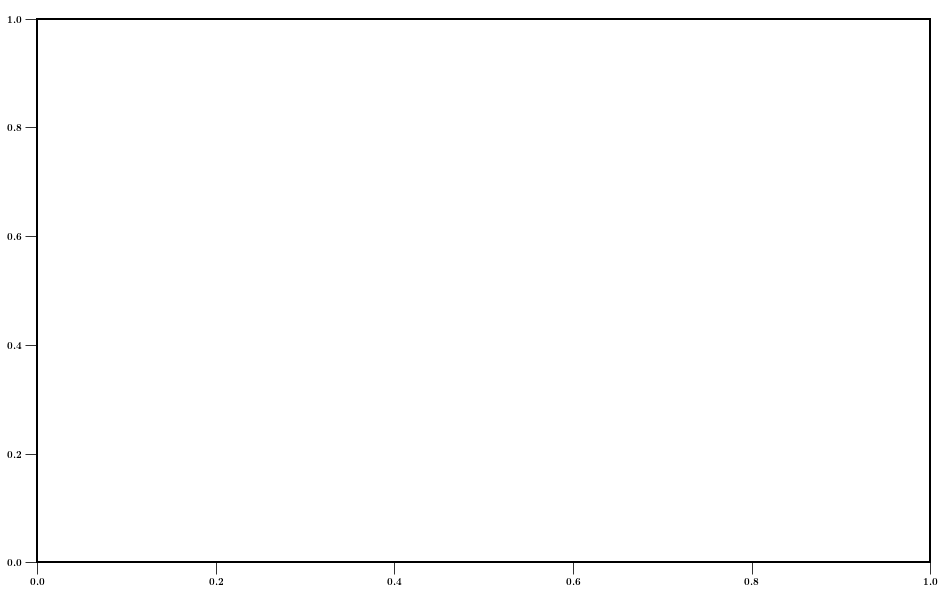

In [6]:




def plotChannels(axes, fc, Data, dictRank, withinHubble=True):
    cm       = plt.get_cmap('inferno')
    nColors  = len(dictRank)+1
    mycolors = colorlist #[cm(x) for x in np.linspace(0,1 , nColors)] 
    solar = 0.0142
    #We are going to sum and fill between channels 
    lowerY = np.zeros(len(Data.metallicityGrid))
    log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
    for nrC, Channel in enumerate(dictChannelsBHNSList):
        #Get the seeds that relate to sorted indices
        seedsInterest = []
        for index in dictRank[Channel]:
            seedsInterest.extend(fc.sortedSeeds[index-1])
        #Get metallicity systems this works because seeds in both
        #files are in the same order
        mask = np.in1d(Data.seeds, np.array(seedsInterest))
        if withinHubble == True:
            mask = mask & (Data.Hubble == True)
        metallicities = Data.metallicitySystems[mask]
        weights = Data.weight[mask] # //floor weights
        #Now I have the metallicities of all systems in channel
        #Bin them over metallicities and plot fill between
        upperY = np.zeros(len(Data.metallicityGrid))
        

        
        for nrZ, Z in enumerate(Data.metallicityGrid):
            maskZ = metallicities == Z
            upperY[nrZ] = np.sum(weights[maskZ]) # //floor weights
        upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY
        axes.fill_between(log10ZZsun, lowerY*1e5, upperY*1e5, \
                         facecolor=colorlist[nrC],\
                          label=dictChannelsBHNSListBolt[nrC], alpha=1)
        lowerY = upperY
        
        
        axes.scatter(log10ZZsun, upperY*1e5, \
                         c='k',\
                         s=20, alpha=1, zorder=1000)
        
    axes.plot(log10ZZsun, upperY*1e5, \
                     c='k',\
                     lw=2, alpha=1, zorder=500)        
        
        
        
    nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
    nameY = r'$\rm dN_{form} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
    axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
    axes.legend(loc=5, prop={'size':18}, ncol=3,\
         bbox_to_anchor=(.92, 1.11))
    
# lgd = f.legend(handles, dictChannelsBHNSListBolt, fontsize=20, ncol=3,\
#          bbox_to_anchor=(.92, 1.2),  markerscale=3., scatterpoints=1) # loc = 'upper center')
#     #axes.set_yscale('log')
    aBit =0.
    axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
    axes.set_ylim(bottom=0)

fig, axes = plt.subplots(1,1,figsize=(16,10))
plotChannels(axes, fc, Data, dictChannelsBHNS , True)
# plotChannels(axes[1], fc, Data, dictRankBHNS, True)

plt.tight_layout()
plt.grid(True)
plt.savefig('./channelBHNS_pessimistic.png', dpi=600)
plt.show()
plt.close()

In [ ]:
def plotChannels(axes, fc, Data, dictRank, withinHubble=True):
    cm       = plt.get_cmap('inferno')
    nColors  = len(dictRank)+1
    mycolors = colorlist #[cm(x) for x in np.linspace(0,1 , nColors)] 
    solar = 0.0142
    #We are going to sum and fill between channels 
    lowerY = np.zeros(len(Data.metallicityGrid))
    log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
    for nrC, Channel in enumerate(dictChannelsBHNSList):
        #Get the seeds that relate to sorted indices
        seedsInterest = []
        for index in dictRank[Channel]:
            seedsInterest.extend(fc.sortedSeeds[index-1])
        #Get metallicity systems this works because seeds in both
        #files are in the same order
        mask = np.in1d(Data.seeds, np.array(seedsInterest))
        if withinHubble == True:
            mask = mask & (Data.Hubble == True)
        metallicities = Data.metallicitySystems[mask]
        weights = Data.weight[mask] # //floor weights
        #Now I have the metallicities of all systems in channel
        #Bin them over metallicities and plot fill between
        upperY = np.zeros(len(Data.metallicityGrid))
        

        
        for nrZ, Z in enumerate(Data.metallicityGrid):
            maskZ = metallicities == Z
            upperY[nrZ] = np.sum(weights[maskZ]) # //floor weights
        upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY
        axes.fill_between(log10ZZsun, lowerY*1e5, upperY*1e5, \
                         facecolor=colorlist[nrC],\
                          label=dictChannelsBHNSListBolt[nrC], alpha=1)
        lowerY = upperY
        
        
        axes.scatter(log10ZZsun, upperY*1e5, \
                         c='k',\
                         s=20, alpha=1, zorder=1000)
    
    # plot thick line on top of combined rate
    axes.plot(log10ZZsun, upperY*1e5, \
                     c='k',\
                     lw=2, alpha=1, zorder=500)
    
    # plot Z values for some fixed metallicities
    text_list = [r'$Z=Z_{\odot}$', r'$Z=0.001$', r'$Z=0.004$' , r'$Z=0.002$']
    for zz_ind, zz in enumerate([0, np.log10(0.001/solar),\
                                 np.log10(0.004/solar), np.log10(0.002/solar)]) :
        axes.plot([zz,zz], [0,0.7], \
                         c='k',\
                         lw=2, alpha=1, linestyle=':', zorder=600)   
        if zz_ind==0:
            axes.text(zz-0.1, 0.66, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='top')
        else:
            axes.text(zz-0.1, 0.01, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='bottom')

    # labels & other things to finish the plot
    nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
    nameY = r'$\rm dN_{form} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
    axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)

    aBit =0.
    axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
    axes.set_ylim(bottom=0, top=0.67)

fig, axes = plt.subplots(1,1,figsize=(8,8))
plotChannels(axes, fc, Data, dictChannelsBHNS , True)
# plotChannels(axes[1], fc, Data, dictRankBHNS, True)

plt.tight_layout()
# plt.grid(True)
plt.savefig('./channelBHNS_pessimistic_small_4channels.png')
plt.show()
plt.close()

# PLOT ALL DCO subchannel rates 

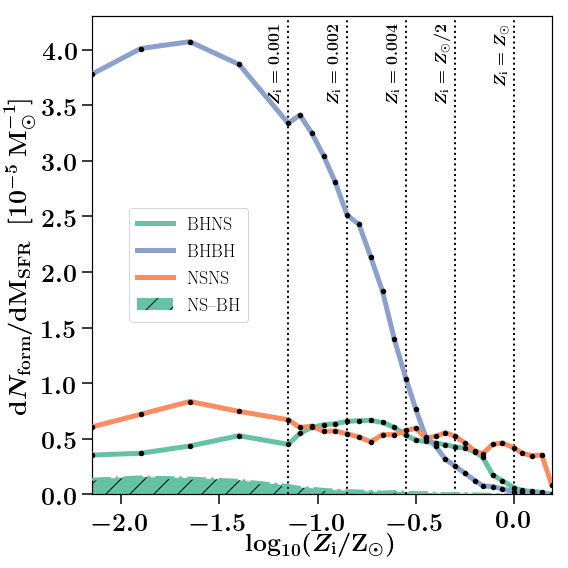

In [41]:
def plotChannels_Fiducial(axes, listDatas, modelnames, withinHubble=True):
    cm       = plt.get_cmap('inferno')
#     nColors  = len(dictRank)+1
    mycolors = colorlist #[cm(x) for x in np.linspace(0,1 , nColors)] 
    solar = 0.0142
    #We are going to sum and fill between channels 
    lowerY = np.zeros(len(listDatas[0][0].metallicityGrid))
    log10ZZsun = np.round(np.log10(listDatas[0][0].metallicityGrid/solar),2)
    Types      = ['BHNS', 'BHBH', 'NSNS']
#     Colours    = ['mediumaquamarine','midnightblue','mediumvioletred' ]      
    Colours = ['#66c2a5','#8da0cb','#fc8d62']
    for ind_m, modelname in enumerate(modelnames):
    
        DATA_model = listDatas[ind_m]

  

        for ind_t, type in enumerate(Types):

            Data = DATA_model[ind_t]
#             if withinHubble == True:
#                 mask = mask & (Data.Hubble == True)
        #         metallicities = Data.metallicitySystems[mask]
            metallicities = Data.metallicitySystems #[mask]
            weights = Data.weight # //floor weights
        #         #Now I have the metallicities of all systems in channel
        #         #Bin them over metallicities and plot fill between
            upperY = np.zeros(len(Data.metallicityGrid))
            upperYNSfirst = np.zeros(len(Data.metallicityGrid))


            for nrZ, Z in enumerate(Data.metallicityGrid):
                maskZ = metallicities == Z
                upperY[nrZ] = np.sum(weights[maskZ]) # //floor weights
            upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY

            
#             if ind_t==0:
            labelname=Types[ind_t]

            axes.plot(log10ZZsun, upperY*1e5, color=Colours[ind_t], \
                      lw=5, alpha=1, zorder=1000, linestyle=linestyles[ind_m], label=labelname)
            
            axes.scatter(log10ZZsun, upperY*1e5, \
                             c='k',\
                             s=20, alpha=1, zorder=10000)            

            if type=='BHNS':
                # figure out mask for BHMNS where NS forms first :-) 

                seedsInterest = []
                for index in dictChannelsNSorBHfirst['NS-BH']:
                    seedsInterest.extend(fc.sortedSeeds[index-1])
                #Get metallicity systems this works because seeds in both
                #files are in the same order
                maskNSBH = np.in1d(Data.seeds, np.array(seedsInterest))
                if withinHubble == True:
                    maskNSBH = maskNSBH & (Data.Hubble == True)

                #Now I have the metallicities of all systems in channel
                #Bin them over metallicities and plot fill between
#                 upperY = np.zeros(len(Data.metallicityGrid))
                        
                
                
                for nrZ, Z in enumerate(Data.metallicityGrid):
                    maskZ = (metallicities == Z) & (maskNSBH==1)
                    upperYNSfirst[nrZ] = np.sum(weights[maskZ]) # //floor weights            
                upperYNSfirst = np.divide(upperYNSfirst, Data.totalMassEvolvedPerZ) + lowerY

                axes.fill_between(log10ZZsun, lowerY*1e5, upperYNSfirst*1e5, \
                                 facecolor=Colours[ind_t],\
                                  label='NS--BH', alpha=1, hatch='/')
                
                axes.plot(log10ZZsun, upperYNSfirst*1e5, color=Colours[ind_t], \
                          lw=3, alpha=1, zorder=1000, linestyle='-.')
            

    # plot Z values for some fixed metallicities
    text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$',r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.004$' , r'$Z_{\rm{i}}=0.002$']
    for zz_ind, zz in enumerate([0, np.log10(0.5), np.log10(0.001/solar),\
                                 np.log10(0.004/solar), np.log10(0.002/solar)]) :
        axes.plot([zz,zz], [0,4.3], \
                         c='k',\
                         lw=2, alpha=1, linestyle=':', zorder=600)   
#         if zz_ind==0:
        axes.text(zz-0.1, 4.25, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='top')
#         else:
#             axes.text(zz-0.1, 4.2, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='bottom')


    
    nameX = r'$\log_{10}(Z_{\rm{i}}/\rm{Z}_{\odot})$'
    nameY = r'${\rm{d}} N_{\rm{form}} / \rm{d}M_{\rm{SFR}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\  $'
    axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
    axes.legend(loc=5, prop={'size':18}, ncol=1,\
         bbox_to_anchor=(.36, 0.48))
    
# lgd = f.legend(handles, dictChannelsBHNSListBolt, fontsize=20, ncol=3,\
#          bbox_to_anchor=(.92, 1.2),  markerscale=3., scatterpoints=1) # loc = 'upper center')
#     #axes.set_yscale('log')
    aBit =0.
    axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
    axes.set_ylim(bottom=0.0,top=4.3)
#   LOG 
#     axes.set_ylim(bottom=0.1,top=4.3)
#     axes.set_yscale('log')    
d01 = [Data_01_BHNS, Data_01_BBH, Data_01_BNS]

    
listDatas = [d01]    
modelnames = ['Fiducial']
linestyles = ['-', '--', '-.', ':']
dictChannelsNSorBHfirst= {'BH-NS':[], 'NS-BH':[6,8,13,21,24,26,27,29, 33,34, 36,42,43,46,47,54,55]}

fig, axes = plt.subplots(1,1,figsize=(8,8))
plotChannels_Fiducial(axes,  listDatas, modelnames , True)


plt.tight_layout()
# plt.grid(True)
plt.savefig('./Rate_vs_Z_pessimistic_Fiducial.png')
plt.show()
plt.close()

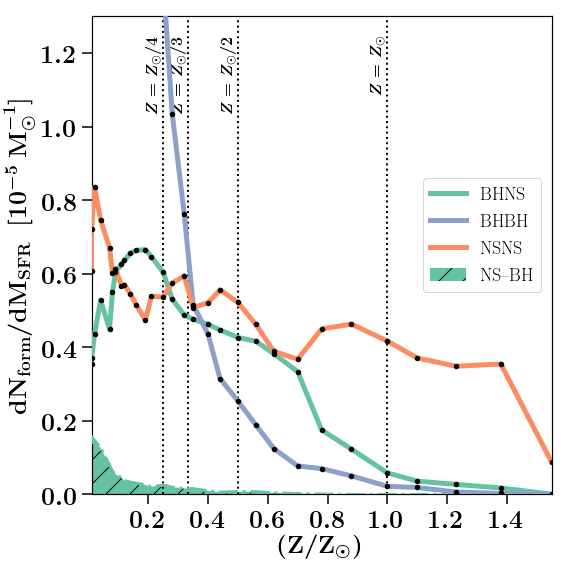

In [37]:
def plotChannels_Fiducial(axes, listDatas, modelnames, withinHubble=True):
    cm       = plt.get_cmap('inferno')
#     nColors  = len(dictRank)+1
    mycolors = colorlist #[cm(x) for x in np.linspace(0,1 , nColors)] 
    solar = 0.0142
    #We are going to sum and fill between channels 
    lowerY = np.zeros(len(listDatas[0][0].metallicityGrid))
    log10ZZsun = np.round((listDatas[0][0].metallicityGrid/solar),2)
    Types      = ['BHNS', 'BHBH', 'NSNS']
#     Colours    = ['mediumaquamarine','midnightblue','mediumvioletred' ]      
    Colours = ['#66c2a5','#8da0cb','#fc8d62']
    for ind_m, modelname in enumerate(modelnames):
    
        DATA_model = listDatas[ind_m]

  

        for ind_t, type in enumerate(Types):

            Data = DATA_model[ind_t]
#             if withinHubble == True:
#                 mask = mask & (Data.Hubble == True)
        #         metallicities = Data.metallicitySystems[mask]
            metallicities = Data.metallicitySystems #[mask]
            weights = Data.weight # //floor weights
        #         #Now I have the metallicities of all systems in channel
        #         #Bin them over metallicities and plot fill between
            upperY = np.zeros(len(Data.metallicityGrid))
            upperYNSfirst = np.zeros(len(Data.metallicityGrid))


            for nrZ, Z in enumerate(Data.metallicityGrid):
                maskZ = metallicities == Z
                upperY[nrZ] = np.sum(weights[maskZ]) # //floor weights
            upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY

            
#             if ind_t==0:
            labelname=Types[ind_t]

            axes.plot(log10ZZsun, upperY*1e5, color=Colours[ind_t], \
                      lw=5, alpha=1, zorder=1000, linestyle=linestyles[ind_m], label=labelname)
            
            axes.scatter(log10ZZsun, upperY*1e5, \
                             c='k',\
                             s=20, alpha=1, zorder=10000)            

            if type=='BHNS':
                # figure out mask for BHMNS where NS forms first :-) 

                seedsInterest = []
                for index in dictChannelsNSorBHfirst['NS-BH']:
                    seedsInterest.extend(fc.sortedSeeds[index-1])
                #Get metallicity systems this works because seeds in both
                #files are in the same order
                maskNSBH = np.in1d(Data.seeds, np.array(seedsInterest))
                if withinHubble == True:
                    maskNSBH = maskNSBH & (Data.Hubble == True)

                #Now I have the metallicities of all systems in channel
                #Bin them over metallicities and plot fill between
#                 upperY = np.zeros(len(Data.metallicityGrid))
                        
                
                
                for nrZ, Z in enumerate(Data.metallicityGrid):
                    maskZ = (metallicities == Z) & (maskNSBH==1)
                    upperYNSfirst[nrZ] = np.sum(weights[maskZ]) # //floor weights            
                upperYNSfirst = np.divide(upperYNSfirst, Data.totalMassEvolvedPerZ) + lowerY

                axes.fill_between(log10ZZsun, lowerY*1e5, upperYNSfirst*1e5, \
                                 facecolor=Colours[ind_t],\
                                  label='NS--BH', alpha=1, hatch='/')
                
                axes.plot(log10ZZsun, upperYNSfirst*1e5, color=Colours[ind_t], \
                          lw=3, alpha=1, zorder=1000, linestyle='-.')
            

    # plot Z values for some fixed metallicities
    text_list = [r'$Z=Z_{\odot}$', r'$Z=Z_{\odot}/2$', r'$Z=Z_{\odot}/3$' , r'$Z=Z_{\odot}/4$']
    for zz_ind, zz in enumerate([1, (0.5),\
                                 (1./3), (1./4)]) :
        axes.plot([zz,zz], [0,1.3], \
                         c='k',\
                         lw=2, alpha=1, linestyle=':', zorder=600)   
#         if zz_ind==0:
        axes.text(zz, 1.25, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='top', ha='right')
#         else:
#             axes.text(zz-0.1, 4.2, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='bottom')


    
    nameX = r'$\rm (Z/Z_{\odot})$'
    nameY = r'$\rm dN_{form} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
    axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
    axes.legend(loc=2, prop={'size':18}, ncol=1,\
         bbox_to_anchor=(0.7, 0.68))
    
# lgd = f.legend(handles, dictChannelsBHNSListBolt, fontsize=20, ncol=3,\
#          bbox_to_anchor=(.92, 1.2),  markerscale=3., scatterpoints=1) # loc = 'upper center')
#     #axes.set_yscale('log')
    aBit =0.
    axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
    axes.set_ylim(bottom=0.0,top=1.3)
#   LOG 
#     axes.set_ylim(bottom=0.1,top=4.3)
#     axes.set_yscale('log')    
d01 = [Data_01_BHNS, Data_01_BBH, Data_01_BNS]

    
listDatas = [d01]    
modelnames = ['Fiducial']
linestyles = ['-', '--', '-.', ':']
dictChannelsNSorBHfirst= {'BH-NS':[], 'NS-BH':[6,8,13,21,24,26,27,29, 33,34, 36,42,43,46,47,54,55]}

fig, axes = plt.subplots(1,1,figsize=(8,8))
plotChannels_Fiducial(axes,  listDatas, modelnames , True)


plt.tight_layout()
# plt.grid(True)
plt.savefig('./Rate_vs_Z_pessimistic_Fiducial_Linear.png')
plt.show()
plt.close()

In [34]:
log10ZZsun = np.round(np.log10(listDatas[0][0].metallicityGrid/solar),2)

In [15]:
print(log10ZZsun)

[-2.15 -1.9  -1.65 -1.4  -1.15 -1.09 -1.03 -0.97 -0.91 -0.85 -0.79 -0.73
 -0.67 -0.61 -0.55 -0.5  -0.45 -0.4  -0.35 -0.3  -0.25 -0.2  -0.16 -0.11
 -0.06  0.    0.04  0.09  0.14  0.19]


# make awesome 6-plot metallicity

In [6]:
def plotmetallicitydistribution(axe, xvar, nrbins, ZofInterest, xvarrange, xlabel, ylabel, xlim, ylim, indplot):
    """ plot distribution of xvar for array of metallicities 
    input:
    
    axe = the axis to plot it on
    xvar= the array of data that you want to plot the kde of
    bw_method = bandwith method of the kernel density function you want to use (see class gaussian_kde())
    xvarrange, the x-axis range to use for the kde [should be typically slightly larger than the range of xvar]
    xlabel, ylabel = x and y labels of the plot
    xlim, ylim = xlim and ylim of the plot axis 
    indplot = something I use to hack the legend labels (I only want to plot the legends for some subplots)
    you can just put indplot=0 or indplot=1 to get labels or no labels resp. 
    
    """    
    
    ymax = 0
#     groups  = dictChannelsBBHList  
    ZlabelIndex = [r'\approx Z_{\odot} / 50', r'\approx Z_{\odot} / 10',r'\approx Z_{\odot} / 5',\
                   r'\approx Z_{\odot} / 2', r'\approx Z_{\odot} ']
    
    # set kde  range of parameter
    # xx_boot is the x points for which we will use a kde to calculate the y-value of the distribution
    resKDE =250#100#0 # just nr of interpolation points for kde function (this is not the bandwith)
    # if xvarrange is specified use that, otherwise base it on xvar range
    if xvarrange:
        xx_boot = np.linspace(xvarrange[0], xvarrange[1], resKDE)
    else:
        xx_boot = np.linspace(min(xvar)*0.8,max(xvar)*1.2, resKDE)
    
   
    # I want to plot a kde for each metallcity in ZofInterest
    for nrZ, Z in enumerate(ZOfInterest):
        
        # only plot the label if indplot=0
        if indplot==0:
            LABEL = r'$Z_{\rm{i}} = %s$'%ZlabelIndex[nrZ]
        else:
            LABEL = None 
            
            
        ind        = np.where(Data.metallicityGrid == Z)[0]
        # Corresponding Mass Evolved per metallicity simulation
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z

        m = xvar[boolZ]
        w     = Data.weight[boolZ]

        
        KDE = gaussian_kde(m, weights=w, bw_method = nrbins)
        # y value of the kde distribution
        y_boot = KDE(xx_boot) * np.sum(w) / MsunEvolved # normalize to total weight to real rate

        
        axe.plot(xx_boot, (y_boot)*1E6, c=mycolors[nrZ], linewidth=5, label=LABEL)
        
        ymax = max(np.concatenate(([ymax], y_boot*1E6)))
    ###########

    
    if xlim:
        axe.set_xlim(xlim[0], xlim[1])
    if ylim:
        axe.set_ylim(ylim[0], ymax*1.05)

    axe == CV.layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=fs)

    
    if indplot==0: 
        handles, labels = axe.get_legend_handles_labels()
    else:
        handles, labels = None, None
        
    
    
    return handles, labels

###################




    

# HORIZONTAL METALLICITY DISTRIBUTIONS PLOT

In [7]:
#But I want only within Hubble time 
OPTIMISTIC = False
DCOtype='BHNS'
pathCOMPASOutput='/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial/'
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=1)
Data.setCOMPASDCOmask(types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC)
Data.setCOMPASData()
SeedsHubble    = Data.seeds[Data.Hubble==True]

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


('bandwidth kde =', 0.1)


KeyboardInterrupt: 

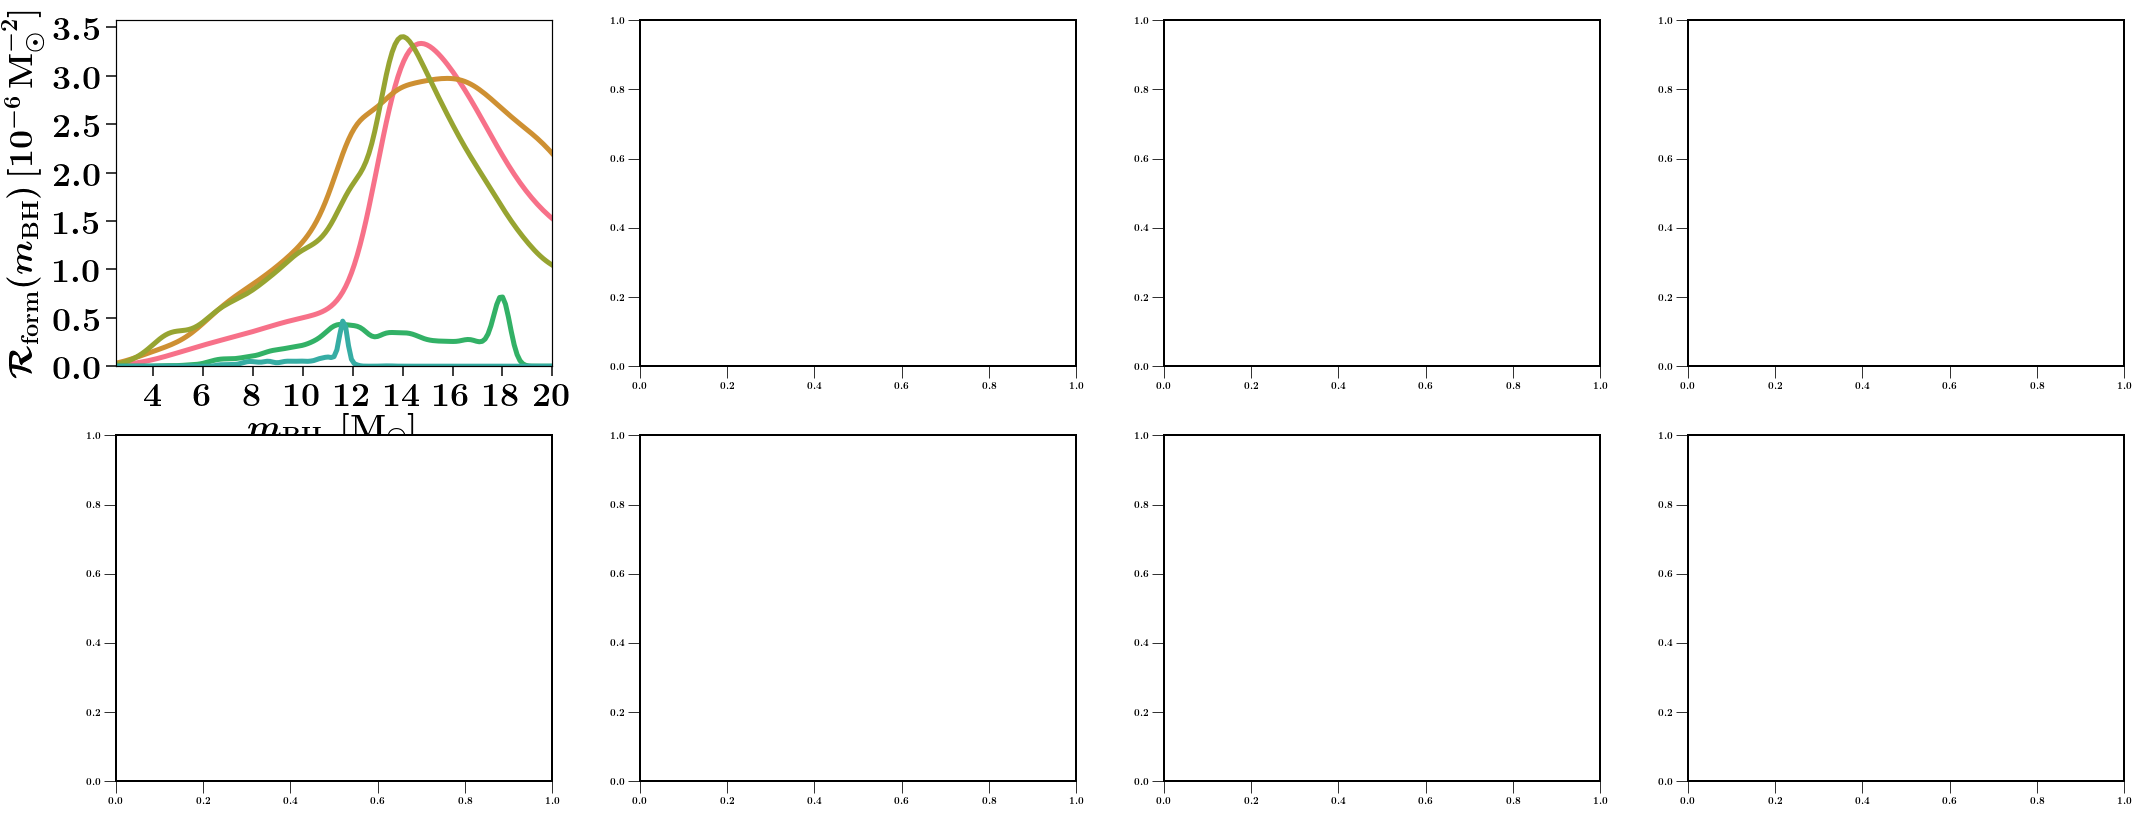

In [7]:

linewidth=3.5
ALPHA=0


mycolors = ['#ffffb2','#fed976','#feb24c','#fd8d3c','#f03b20','#bd0026']
mycolors= np.flip(mycolors)



import seaborn as sns

mycolors       = sns.color_palette("husl", 8)


# print(mycolors)
f, ax= plt.subplots(ncols=4,nrows=2,figsize=(36,14), 
                  gridspec_kw={"width_ratios":[1.5, 1.5,1.5,1.5], "height_ratios":[2,2]})

fs=34

#general
Nbins= 'silverman' #.055 #.05#50 #.1 #50
indicesZ   = np.array([0, 4, 9, 14, 25])
ZOfInterest = Data.metallicityGrid[indicesZ]

# [0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
#            0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
#            0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
#            0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
#            0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
#            0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
#            0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
#            0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]


ZOfInterest = np.asarray([0.00027, 0.0014, 0.00272, 0.00732, 0.01416 ])

####### BH MASS 
M1, M2 = Data.mass1, Data.mass2
MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
xvar = MBH
nameY = r'$ \mathcal{R}_{\rm{form}}(m_{\rm{BH}}) \, [10^{-6}\, \rm{M}_{\odot}^{-2}]  $'
nameX = r' $m_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'


n= len(M1)*5
d=1
# print(n**(-1./(d+4)))

# print((n * (d + 2) / 4.)**(-1. / (d + 4)))
Nbins=0.1

print('bandwidth kde =', Nbins)


handles, labels=plotmetallicitydistribution(axe=ax[0,0], xvar=xvar, nrbins=Nbins, \
                                            ZofInterest=ZOfInterest,  xvarrange=[1,30],\
                                            xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,20], ylim=[0,1.5], indplot=0) 



####### NS MASS 
# Nbins='silverman'#0.05
xvar = MNS
nameY = r'$\mathcal{R}_{\rm{form}}(m_{\rm{NS}}) \, [10^{-6}\, \rm{M}_{\odot}^{-2}]  $'
nameX = r' $m_{\rm{NS}}$ $ \,  [\rm{M}_{\odot}]$'

_,_=plotmetallicitydistribution(axe=ax[0,1], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[0,5],\
                           xlabel=nameX, ylabel=nameY, \
                              xlim=[1.2,2.5], ylim=[0,31], indplot=1) 




####### mass ratio
xvar = MBH/MNS
nameY = r'$\mathcal{R}_{\rm{form}}(q_{\rm{f}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1}]  $'
nameX = r' $q_{\rm{f}}$ $ \,  [\rm{M}_{\odot}]$'

_,_=plotmetallicitydistribution(axe=ax[0,2], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[1,15],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[1,14], ylim=[0,4], indplot=2) 




####### mass total
xvar = MBH+MNS
nameY = r'$ \mathcal{R}_{\rm{form}}(m_{\rm{tot}}) \, [10^{-6}\, \rm{M}_{\odot}^{-2}]  $'
nameX = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'

_,_=plotmetallicitydistribution(axe=ax[1,0], xvar=xvar, nrbins=Nbins,\
                           ZofInterest=ZOfInterest,  xvarrange=[1,25],\
                           xlabel=nameX, ylabel=nameY, \
                              xlim=[3,30], ylim=[0,1.5], indplot=4) 



####### CHIRP MASS
xvar = chirpmass(MBH, MNS)
nameY = r'$ \mathcal{R}_{\rm{form}}(\mathcal{M}_{\rm{c}}) \, [10^{-6}\, \rm{M}_{\odot}^{-2}]  $'
nameX = r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'

_,_=plotmetallicitydistribution(axe=ax[1,1], xvar=xvar, nrbins=Nbins,\
                           ZofInterest=ZOfInterest,  xvarrange=[1,10],\
                           xlabel=nameX, ylabel=nameY, \
                              xlim=[1,6], ylim=[0,7.5], indplot=5) 





# ######## INSPIRAL TIME
xvar = Data.tc / 1000
# nameY = r'$ \rm{d}N /(\rm{d}M_{\rm{SFR}} \rm{d}t_{\rm{inspiral}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1} \rm{Gyr}^{-1}]  $'
nameY = r'$\mathcal{R}_{\rm{form}}(t_{\rm{inspiral}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1} \rm{Gyr}^{-1}]  $'
nameX = r' $t_{\rm{inspiral}}$ $ \,  [\rm{Gyr}]$'

_,_=plotmetallicitydistribution(axe=ax[1,2], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[0,15],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[1,14], ylim=[0,3.6], indplot=5) 



# ######## INSPIRAL TIME
xvar = Data.eccentricityDCOFormation 
nameY = r'$ \mathcal{R}_{\rm{form}}(e_{\rm{f}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1}]  $'
nameX = r' $e_{\rm{f}}$ $ \, $'

_,_=plotmetallicitydistribution(axe=ax[0,3], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[-0.5,2],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[0,1], ylim=[0,35.0], indplot=5) 




# ######## INSPIRAL TIME
xvar = np.log10(Data.separationDCOFormation)
# nameY = r'$ \rm{d}N /(\rm{d}M_{\rm{SFR}} \rm{d}a_{\rm{f}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1} \, \rm{AU}]  $'
# nameX = r' $\log_{10}(a_{\rm{f}})$ $ \, [\rm{AU}] $'

nameY = r'$ \mathcal{R}_{\rm{form}}(\log_{10} a_{\rm{f}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1} \, \rm{AU}^{-1}]  $'
nameX = r' $\log_{10}(a_{\rm{f}})$ $ \, [\rm{AU}] $'

_,_=plotmetallicitydistribution(axe=ax[1,3], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[-2,2],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[-2,1], ylim=[0,30.6], indplot=5) 


# # ###########


# # LEGEND
lgd = f.legend(handles, labels, fontsize=fs+8, ncol=5,\
         bbox_to_anchor=(0.91, 1.12),  markerscale=3., scatterpoints=1) # loc = 'upper center')




plt.tight_layout()
plt.subplots_adjust(wspace=0.34, hspace=0.32)
plt.savefig('./CombinedZdistributions_horizontal.png', dpi=100, transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()








# BHBH 

In [8]:
#But I want only within Hubble time 
OPTIMISTIC = False
DCOtype='BBH'
pathCOMPASOutput='/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial/'
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=1)
Data.setCOMPASDCOmask(types=DCOtype,  withinHubbleTime=True, optimistic=OPTIMISTIC)
Data.setCOMPASData()
SeedsHubble    = Data.seeds[Data.Hubble==True]

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


('bandwidth kde =', 0.1)


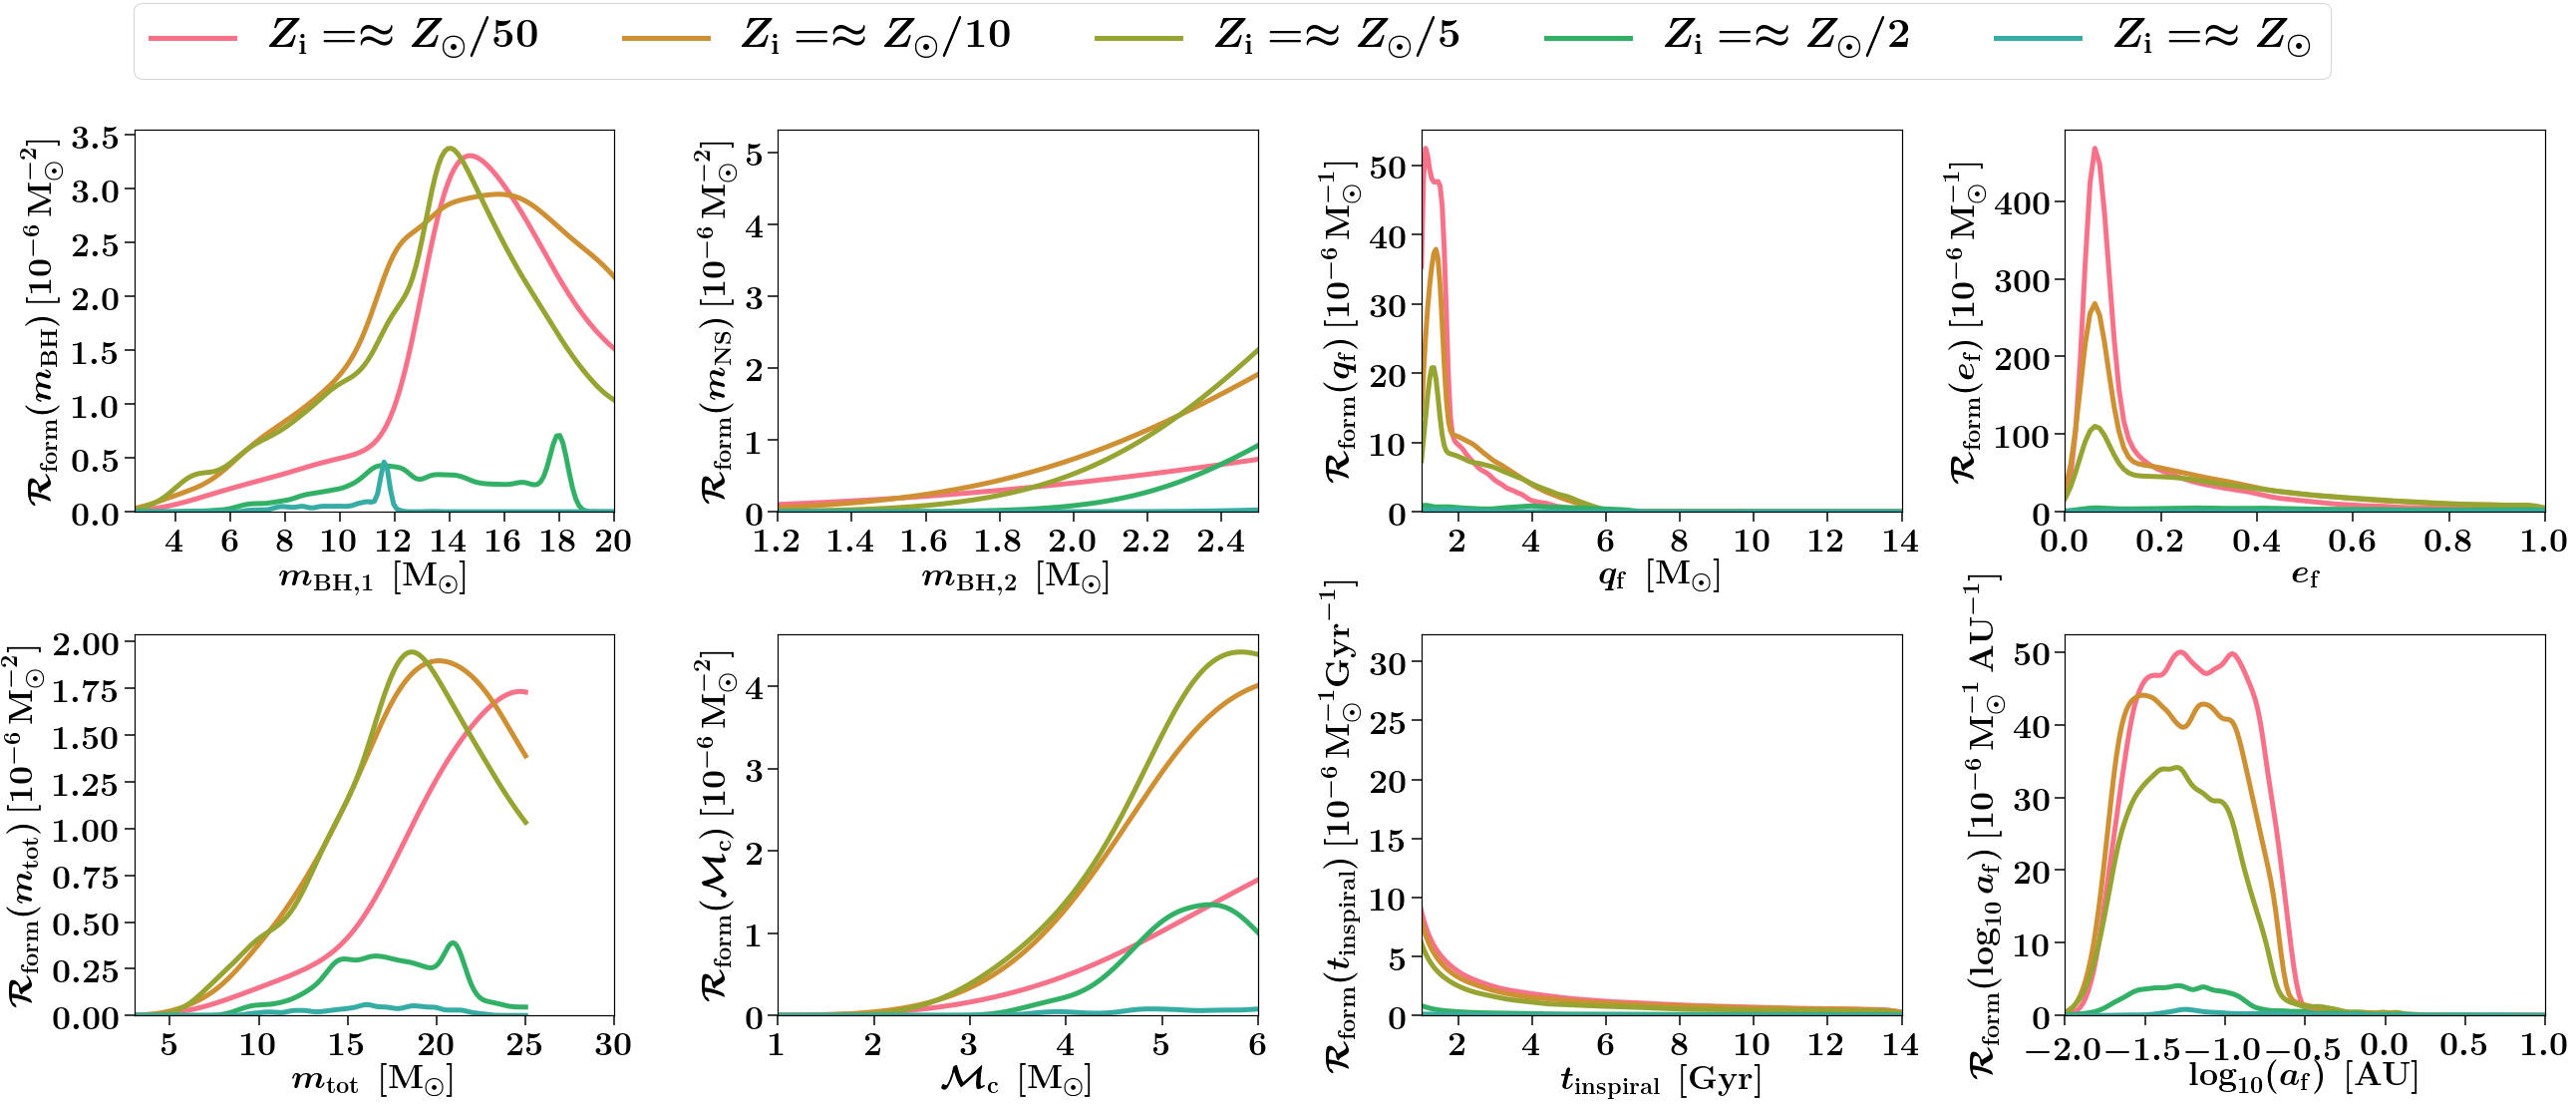

In [9]:

linewidth=3.5
ALPHA=0


mycolors = ['#ffffb2','#fed976','#feb24c','#fd8d3c','#f03b20','#bd0026']
mycolors= np.flip(mycolors)



import seaborn as sns

mycolors       = sns.color_palette("husl", 8)


# print(mycolors)
f, ax= plt.subplots(ncols=4,nrows=2,figsize=(36,14), 
                  gridspec_kw={"width_ratios":[1.5, 1.5,1.5,1.5], "height_ratios":[2,2]})

fs=34

#general
Nbins= 'silverman' #.055 #.05#50 #.1 #50
indicesZ   = np.array([0, 4, 9, 14, 25])
ZOfInterest = Data.metallicityGrid[indicesZ]

# [0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
#            0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
#            0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
#            0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
#            0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
#            0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
#            0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
#            0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]


ZOfInterest = np.asarray([0.00027, 0.0014, 0.00272, 0.00732, 0.01416 ])

####### BH MASS 
M1, M2 = Data.mass1, Data.mass2
MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
xvar = MBH
nameY = r'$ \mathcal{R}_{\rm{form}}(m_{\rm{BH}}) \, [10^{-6}\, \rm{M}_{\odot}^{-2}]  $'
nameX = r' $m_{\rm{BH,1}}$ $ \,  [\rm{M}_{\odot}]$'


n= len(M1)*5
d=1
# print(n**(-1./(d+4)))

# print((n * (d + 2) / 4.)**(-1. / (d + 4)))
Nbins=0.1

print('bandwidth kde =', Nbins)


handles, labels=plotmetallicitydistribution(axe=ax[0,0], xvar=xvar, nrbins=Nbins, \
                                            ZofInterest=ZOfInterest,  xvarrange=[1,30],\
                                            xlabel=nameX, ylabel=nameY, \
                              xlim=[2.5,20], ylim=[0,1.5], indplot=0) 



####### NS MASS 
# Nbins='silverman'#0.05
xvar = MNS
nameY = r'$\mathcal{R}_{\rm{form}}(m_{\rm{NS}}) \, [10^{-6}\, \rm{M}_{\odot}^{-2}]  $'
nameX = r' $m_{\rm{BH,2}}$ $ \,  [\rm{M}_{\odot}]$'

_,_=plotmetallicitydistribution(axe=ax[0,1], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[0,5],\
                           xlabel=nameX, ylabel=nameY, \
                              xlim=[1.2,2.5], ylim=[0,31], indplot=1) 




####### mass ratio
xvar = MBH/MNS
nameY = r'$\mathcal{R}_{\rm{form}}(q_{\rm{f}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1}]  $'
nameX = r' $q_{\rm{f}}$ $ \,  [\rm{M}_{\odot}]$'

_,_=plotmetallicitydistribution(axe=ax[0,2], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[1,15],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[1,14], ylim=[0,4], indplot=2) 




####### mass total
xvar = MBH+MNS
nameY = r'$ \mathcal{R}_{\rm{form}}(m_{\rm{tot}}) \, [10^{-6}\, \rm{M}_{\odot}^{-2}]  $'
nameX = r' $m_{\rm{tot}}$ $ \,  [\rm{M}_{\odot}]$'

_,_=plotmetallicitydistribution(axe=ax[1,0], xvar=xvar, nrbins=Nbins,\
                           ZofInterest=ZOfInterest,  xvarrange=[1,25],\
                           xlabel=nameX, ylabel=nameY, \
                              xlim=[3,30], ylim=[0,1.5], indplot=4) 



####### CHIRP MASS
xvar = chirpmass(MBH, MNS)
nameY = r'$ \mathcal{R}_{\rm{form}}(\mathcal{M}_{\rm{c}}) \, [10^{-6}\, \rm{M}_{\odot}^{-2}]  $'
nameX = r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'

_,_=plotmetallicitydistribution(axe=ax[1,1], xvar=xvar, nrbins=Nbins,\
                           ZofInterest=ZOfInterest,  xvarrange=[1,10],\
                           xlabel=nameX, ylabel=nameY, \
                              xlim=[1,6], ylim=[0,7.5], indplot=5) 





# ######## INSPIRAL TIME
xvar = Data.tc / 1000
# nameY = r'$ \rm{d}N /(\rm{d}M_{\rm{SFR}} \rm{d}t_{\rm{inspiral}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1} \rm{Gyr}^{-1}]  $'
nameY = r'$\mathcal{R}_{\rm{form}}(t_{\rm{inspiral}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1} \rm{Gyr}^{-1}]  $'
nameX = r' $t_{\rm{inspiral}}$ $ \,  [\rm{Gyr}]$'

_,_=plotmetallicitydistribution(axe=ax[1,2], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[0,15],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[1,14], ylim=[0,3.6], indplot=5) 



# ######## INSPIRAL TIME
xvar = Data.eccentricityDCOFormation 
nameY = r'$ \mathcal{R}_{\rm{form}}(e_{\rm{f}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1}]  $'
nameX = r' $e_{\rm{f}}$ $ \, $'

_,_=plotmetallicitydistribution(axe=ax[0,3], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[-0.5,2],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[0,1], ylim=[0,35.0], indplot=5) 




# ######## INSPIRAL TIME
xvar = np.log10(Data.separationDCOFormation)
# nameY = r'$ \rm{d}N /(\rm{d}M_{\rm{SFR}} \rm{d}a_{\rm{f}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1} \, \rm{AU}]  $'
# nameX = r' $\log_{10}(a_{\rm{f}})$ $ \, [\rm{AU}] $'

nameY = r'$ \mathcal{R}_{\rm{form}}(\log_{10} a_{\rm{f}}) \, [10^{-6}\, \rm{M}_{\odot}^{-1} \, \rm{AU}^{-1}]  $'
nameX = r' $\log_{10}(a_{\rm{f}})$ $ \, [\rm{AU}] $'

_,_=plotmetallicitydistribution(axe=ax[1,3], xvar=xvar, nrbins=Nbins, \
                                ZofInterest=ZOfInterest,  xvarrange=[-2,2],\
                                xlabel=nameX, ylabel=nameY, \
                              xlim=[-2,1], ylim=[0,30.6], indplot=5) 


# # ###########


# # LEGEND
lgd = f.legend(handles, labels, fontsize=fs+8, ncol=5,\
         bbox_to_anchor=(0.91, 1.12),  markerscale=3., scatterpoints=1) # loc = 'upper center')




plt.tight_layout()
plt.subplots_adjust(wspace=0.34, hspace=0.32)
plt.savefig('./CombinedZdistributions_horizontal_BHBH.png', dpi=100, transparent=False,\
           bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.close()








In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=False)


Types      = ['BHNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['mediumaquamarine','mediumvioletred' ]

alphas     = [1. ,0.65, 0.4, 0.25]
indicesZ   = np.array([4, 11, 17, 24]) # #np.array([14,17,22,25]) OLD = [4,13,24]

alphas     = [1. ,1, 1, 1] #[1. ,0.65, 0.4, 0.25]
# indicesZ   = np.array([3,4,5,6]) # #np.array([14,17,22,25])
minBin     = [0,  0,  2]
maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)

cm       = plt.get_cmap('viridis')
nColors  = len(indicesZ)+1
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]


import seaborn as sns
colors_Z = sns.color_palette("husl", nColors)
mycolors=colors_Z
# sns.set_palette("husl")


mycolors = ['#ffffb2','#fecc5c','#fd8d3c','#f03b20','#bd0026']
mycolors= np.flip(mycolors)
print(mycolors)

In [ ]:
    # ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
    axes = [axe] #, ax2]
    for nrT, Type in enumerate(Types):
        Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
        Data.setCOMPASData()
        #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])


    # #########COEN binning  ######
    #     if nrT != 2:
    #         binsM, width = binsM1, width1
    #     else:
    #         binsM, width = binsM2, width2
    ################
        ZOfInterest = Data.metallicityGrid[indicesZ]
        print ZOfInterest

In [ ]:
from pylab import *

In [ ]:
linewidth=3.5
ALPHA=0

indZ  = np.array([14,17,22,25]) #looked up earlier
indicesZ   = np.array([0, 4, 9, 14, 25])

# mycolors = sns.cubehelix_palette(nColors, reverse=True)
mycolors = ['#ffffb2','#fed976','#feb24c','#fd8d3c','#f03b20','#bd0026']
mycolors= np.flip(mycolors)
# print(mycolors)


# N = nColors
# cmap = plt.cm.plasma  # define the colormap
# # extract all colors from the .jet map
# cmaplist = [cmap(i) for i in range(cmap.N)]
# # force the first color entry to be grey
# mycolors = sns.color_palette("viridis", nColors+1)

f, ax= plt.subplots(ncols=2,nrows=3,figsize=(20,23), 
                  gridspec_kw={"width_ratios":[1.5, 1.5], "height_ratios":[2,2,2]})
ax[0,0]=plotBHmass(ax[0,0])
ax[0,1]=plotNSmass(ax[0,1])
ax[1,0]=plotq(ax[1,0]) 
ax[1,1]=plotTinspLin(ax[1,1])
ax[2,0]=plotMtot(ax[2,0])
ax[2,1]=plotMchirp(ax[2,1])

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.savefig('./CombinedZdistributions.png', dpi=600, transparent=False)
plt.show()
plt.close()


# FOR TOM



# ALL MERGERS IN T HUBBLE 

In [ ]:


#Set up and do formation channels, so I can get the seeds
fc = FC.FormationChannels(path = pathCOMPASOutput)
fc.formationChannelsSeeds(types='BHNS', withinHubbleTime=True, optimistic=False)
#Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=False)
Data.setCOMPASData()
SeedsHubble    = Data.seeds[Data.Hubble==True]

In [ ]:
def plotSeparation(axe):
    indicesZ   = np.array([25])
# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
    axes = [axe] #, ax2]
    Types =['BHNS']
    for nrT, Type in enumerate(Types):
        Data.setCOMPASDCOmask(types=Type, withinHubbleTime=False, optimistic=False)
        Data.setCOMPASData()
        #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])


    # #########COEN binning  ######
    #     if nrT != 2:
    #         binsM, width = binsM1, width1
    #     else:
    #         binsM, width = binsM2, width2
    ################
        ZOfInterest = Data.metallicityGrid[indicesZ]
        print 'Z= ', ZOfInterest
        for nrZ, Z in enumerate(ZOfInterest):

            ind        = np.where(Data.metallicityGrid == Z)[0]

            MsunEvolved= Data.totalMassEvolvedPerZ[ind]
            boolZ      = Data.metallicitySystems == Z
            M1         = Data.mass1[boolZ]
            M2         = Data.mass2[boolZ]
            Mtot       = M1 + M2
            log10tc= np.log10(Data.separationDCOFormation[boolZ])
#             log10tc= (Data.tc[boolZ])


            weight     = Data.weight[boolZ]
            neff = (np.sum(weight))**2 / float(np.sum(weight**2.))

            # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
            binsM = np.linspace(min(log10tc)*0.95,max(log10tc)*1.1, int(2*(neff)**(1./3)))
            width = np.diff(binsM)


            y, _   = np.histogram(log10tc, bins=binsM, weights= weight)
    #         y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
            y          = np.divide(y, width) 
            y          = y/MsunEvolved
            x          = (binsM[1:] + binsM[:-1])/2.
            #y, x       = CV.stepifyMe(y, binsM, None, 0)
            #only label once for the darkest colour
            if nrT != 2 and nrZ == 0:
                label = Type
            elif nrT == 2 and nrZ ==0:
                label = Type
            else:
                label = None
    #         if nrT != 2:
            axe.bar(x,y, width=x[1]-x[0], align='center', alpha=ALPHA, color=mycolors[nrZ])
            axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=linewidth, label=r'$Z = %s$'%Z) #alphas[nrZ]
    #         else:
    #             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)

    nameX = r'$\rm log_{10}(separation at DCO)$'
    nameY = r'$\rm dN / (dlog_{10}(t_{merger}/Myr)\ dM_{SFR})\ \ [M_{\odot}^{-1}]$'
    for nrA, ax in enumerate(axes):
        if nrA ==0:
            ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
        else:
            ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=fs)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axe.yaxis.get_offset_text().set_fontsize(20)
    axe.set_yscale('log')
    # ax2.yaxis.get_offset_text().set_fontsize(14)
    # ax2.set_xlim(2,5)
#     axe.set_ylim(0, 2.3*1e-6)
#     axe.set_xlim(-4, 5)
#     axe.legend(loc=0, prop={'size':18})
    # ax2.legend(loc=3, prop={'size':18})
    #ax1.get_yaxis().set_visible(False)
    axe.grid(True)
    return axe



In [ ]:
linewidth=3.5
ALPHA=0

indZ  = np.array([25]) #looked up earlier
indicesZ   = np.array([25])

# mycolors = sns.cubehelix_palette(nColors, reverse=True)
mycolors = ['#ffffb2','#fed976','#feb24c','#fd8d3c','#f03b20','#bd0026']
mycolors= np.flip(mycolors)
# print(mycolors)


# N = nColors
# cmap = plt.cm.plasma  # define the colormap
# # extract all colors from the .jet map
# cmaplist = [cmap(i) for i in range(cmap.N)]
# # force the first color entry to be grey
# mycolors = sns.color_palette("viridis", nColors+1)

f, ax= plt.subplots(ncols=2,nrows=3,figsize=(20,23), 
                  gridspec_kw={"width_ratios":[1.5, 1.5], "height_ratios":[2,2,2]})
ax[0,0]=plotSeparation(ax[0,0])
# ax[0,1]=plotNSmass(ax[0,1])
# ax[1,0]=plotq(ax[1,0]) 
# ax[1,1]=plotTinspLin(ax[1,1])
# ax[2,0]=plotMtot(ax[2,0])
# ax[2,1]=plotMchirp(ax[2,1])

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.savefig('./SeparationLOGdistributions.png', dpi=600, transparent=False)
plt.show()
plt.close()



# ALL MERGERS 

In [ ]:


#Set up and do formation channels, so I can get the seeds
fc = FC.FormationChannels(path = pathCOMPASOutput)
fc.formationChannelsSeeds(types='BHNS', withinHubbleTime=False, optimistic=False)
#Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=False, optimistic=False)
Data.setCOMPASData()
# SeedsHubble    = Data.seeds[Data.Hubble==True]

In [ ]:
linewidth=3.5
ALPHA=0

indZ  = np.array([25]) #looked up earlier
indicesZ   = np.array([25])

# mycolors = sns.cubehelix_palette(nColors, reverse=True)
mycolors = ['#ffffb2','#fed976','#feb24c','#fd8d3c','#f03b20','#bd0026']
mycolors= np.flip(mycolors)
# print(mycolors)


# N = nColors
# cmap = plt.cm.plasma  # define the colormap
# # extract all colors from the .jet map
# cmaplist = [cmap(i) for i in range(cmap.N)]
# # force the first color entry to be grey
# mycolors = sns.color_palette("viridis", nColors+1)

f, ax= plt.subplots(ncols=2,nrows=3,figsize=(20,23), 
                  gridspec_kw={"width_ratios":[1.5, 1.5], "height_ratios":[2,2,2]})
ax[0,0]=plotSeparation(ax[0,0])
# ax[0,1]=plotNSmass(ax[0,1])
# ax[1,0]=plotq(ax[1,0]) 
# ax[1,1]=plotTinspLin(ax[1,1])
# ax[2,0]=plotMtot(ax[2,0])
# ax[2,1]=plotMchirp(ax[2,1])

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.savefig('./SeparationLOGdistributions_ALL.png', dpi=600, transparent=False)
plt.show()
plt.close()




In [ ]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt


window = signal.gaussian(51, std=7)
plt.plot(window)
plt.title(r"Gaussian window ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.yscale('log')


# N per Z BHNS vs NSBH

In [ ]:
# def plotChannels(axes, fc, Data, dictRank, withinHubble=True):
#     cm       = plt.get_cmap('inferno')
#     nColors  = len(dictRank)+1
#     mycolors = colorlist #[cm(x) for x in np.linspace(0,1 , nColors)] 
#     solar = 0.0142
#     #We are going to sum and fill between channels 
#     lowerY = np.zeros(len(Data.metallicityGrid))
#     log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
#     for nrC, Channel in enumerate(dictRankBHNSList):
#         #Get the seeds that relate to sorted indices
#         seedsInterest = []
#         for index in dictRank[Channel]:
#             seedsInterest.extend(fc.sortedSeeds[index])
#         #Get metallicity systems this works because seeds in both
#         #files are in the same order
#         mask = np.in1d(Data.seeds, np.array(seedsInterest))
#         if withinHubble == True:
#             mask = mask & (Data.Hubble == True)
#         metallicities = Data.metallicitySystems[mask]
#         weights = Data.weight[mask] # //floor weights
#         #Now I have the metallicities of all systems in channel
#         #Bin them over metallicities and plot fill between
#         upperY = np.zeros(len(Data.metallicityGrid))
#         for nrZ, Z in enumerate(Data.metallicityGrid):
#             maskZ = metallicities == Z
#             upperY[nrZ] = np.sum(weights[maskZ]) # //floor weights
#         upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY
#         axes.fill_between(log10ZZsun, lowerY*1e5, upperY*1e5, \
#                          facecolor=mycolors[nrC],\
#                           label=Channel, alpha=0.7)
#         lowerY = upperY
#     nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
#     nameY = r'$\rm dN_{form} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
#     axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
#     axes.legend(loc=1, prop={'size':18})
#     #axes.set_yscale('log')
#     aBit =0.
#     axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
#     axes.set_ylim(bottom=0)

stroop
    
# dictRankBHNSList = ['BH-NS', 'NS-BH']    
# fig, axes = plt.subplots(1,1,figsize=(10,10))
# plotChannels(axes, fc, Data, dictChannelsNSorBHfirst , True)
# # plotChannels(axes[1], fc, Data, dictRankBHNS, True)

# plt.tight_layout()
# plt.savefig('./channelBHNSvsNSBH.png')
# plt.show()
# plt.close()

In [ ]:
# fig, axes = plt.subplots(1,1, figsize=(9,8))

# #fill plot channels for BBH
# Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
#                  Mupper=150., binaryFraction=0.7)
# Data.setCOMPASDCOmask(types='BHNS', withinHubbleTime=True, optimistic=True)
# Data.setCOMPASData() 
# lowerY          = np.zeros(len(Data.metallicityGrid))
# log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
# # for nrC, seedsChannel in enumerate(ChannelSeeds):
# #     upperY = np.zeros(len(Data.metallicityGrid))
# #     for nrZ, Z in enumerate(Data.metallicityGrid):
# #         boolZ       = Data.metallicitySystems ==Z
# #         boolChannel = np.in1d(Data.seeds, seedsChannel)
# #         upperY[nrZ] = np.sum(boolZ & boolChannel)
# #     upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY
# #     axes.fill_between(log10ZZsun, lowerY, upperY, facecolor=ChannelColours[nrC],
# #                       label=ChannelLabels[nrC], alpha=0.7)
# #     lowerY = upperY

# log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)

# cm       = plt.get_cmap('inferno')
# nColors  = 2+1
# mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# for nrT, mask in enumerate(['BHNS']):
    
#     Type = 'BHNS'
#     nrT = 1
    
#     Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=True)
#     Data.setCOMPASData()

    
    
#     yvalues   = np.zeros(len(Data.metallicityGrid))
#     yvaluesNSBH   = np.zeros(len(Data.metallicityGrid))
#     for nrZ, Z in enumerate(Data.metallicityGrid):
#         boolZ   = Data.metallicitySystems ==Z
#         weight     = Data.weight[boolZ]
#         M1         = Data.mass1[boolZ]
#         M2         = Data.mass2[boolZ]    
        
        
#         maskBHNS = getMaskBHNS(M1,M2)
        
#         maskNSBH = ~getMaskBHNS(M1,M2)
    
#         yvalues[nrZ] = np.sum(weight[maskBHNS])
#         yvaluesNSBH[nrZ] = np.sum(weight[maskBHNS]) + np.sum(weight[maskNSBH])
        
        
        
#     sqrtN = np.sqrt(yvaluesNSBH)
#     yvaluesBHNS = np.divide(yvalues, Data.totalMassEvolvedPerZ)
#     #per true Msun evolved per Z
#     yvaluesNSBH = np.divide(yvaluesNSBH, Data.totalMassEvolvedPerZ)
#     #Yerror  = np.divide(Yerror, Data.totalMassEvolvedPerZ)
#     Yerror = np.divide(yvaluesNSBH, sqrtN)
    
    
#     #plot the line
#     if Type == 'BHNS':
#         #fudge to brighten colour line compared to label
#         #axes.plot(log10ZZsun, -yvalues, c=Colours[nrT], alpha=1., lw=3., label=Type)
# #         axes.errorbar(log10ZZsun, yvaluesBHNS, yerr=Yerror, ecolor='aqua',elinewidth=2.)
#         axes.plot(log10ZZsun, yvaluesBHNS, c=mycolors[1], alpha=1., lw=3., label=Type)
#         axes.plot(log10ZZsun, yvaluesNSBH, c='gold', alpha=1., lw=3., label='NSBH')
#         axes.fill_between(log10ZZsun, y1=np.zeros_like(yvaluesBHNS), y2=yvaluesBHNS, color=mycolors[1]) 
#         axes.fill_between(log10ZZsun, y1=yvaluesBHNS, y2=yvaluesNSBH, color='gold')
#     else:
#         axes.plot(log10ZZsun, yvalues, c=Colours[nrT], alpha=1., lw=3., label=Type)
#         axes.errorbar(log10ZZsun, yvalues, yerr=Yerror, ecolor=Colours[nrT],elinewidth=2.)
    
    

# nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
# nameY = r'$\rm dN_{form} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
# axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
# axes.legend(loc=1, prop={'size':18})
# #axes.set_yscale('log')
# aBit =0.
# axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
# axes.set_ylim(bottom=0)
# axes.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# axes.yaxis.get_offset_text().set_fontsize(0.1)
# plt.tight_layout()
# plt.savefig('./nrPerZ_NSBHvsBHNS.png', dpi=100, transparent=False)
# plt.show()
# plt.close()

In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)

Types      = ['BHNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['mediumaquamarine','mediumvioletred' ]



alphas     = [1. ,0.65, 0.4, 0.25]
indicesZ   = np.array([4,13,24]) # #np.array([14,17,22,25])
minBin     = [0,  0,  2]
maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)

cm       = plt.get_cmap('viridis')
nColors  = len(indicesZ)+1
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# alphas     = [1. ,0.8, 0.65, 0.5]#[::-1]
# linestyles = ['-', '--', '-.', ':']
# maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)
# width1     = np.diff(binsM1)
# width2     = np.diff(binsM2)


#with some help of 
#https://matplotlib.org/examples/pylab_examples/broken_axis.html

fig, axe        = plt.subplots(figsize=(10,6))

# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
axes = [axe] #, ax2]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    

# #########COEN binning  ######
#     if nrT != 2:
#         binsM, width = binsM1, width1
#     else:
#         binsM, width = binsM2, width2
################
    ZOfInterest = Data.metallicityGrid[indicesZ]
    print ZOfInterest
    for nrZ, Z in enumerate(ZOfInterest):
        
        ind        = np.where(Data.metallicityGrid == Z)[0]
        
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]
        Mtot       = M1 + M2
#         print Mtot
        weight     = Data.weight[boolZ]
        neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
        print neff, 'neff'
        # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
        binsM = np.linspace(min(Mtot)*0.95,max(Mtot)*1.1, int(2*(neff)**(1./3)))
        width = np.diff(binsM)

        
        y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
        y          = np.divide(y, width) 
        y          = y/MsunEvolved
        x          = (binsM[1:] + binsM[:-1])/2.
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #only label once for the darkest colour
        if nrT != 2 and nrZ == 0:
            label = Type
        elif nrT == 2 and nrZ ==0:
            label = Type
        else:
            label = None
#         if nrT != 2:
        axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=3, label=r'$Z = %s$'%Z) #alphas[nrZ]
#         else:
#             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)
    
nameX = r'$\rm M_{tot} [M_{\odot}]$'
nameY = r'$\rm dN / (dM_{tot}\ dM_{SFR}) \ \ [M_{\odot}^{-2}]$'
for nrA, ax in enumerate(axes):
    if nrA ==0:
        ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
    else:
        ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=fs)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axe.yaxis.get_offset_text().set_fontsize(20)
# ax2.yaxis.get_offset_text().set_fontsize(14)
axe.set_xlim(2,35)
axe.set_ylim(0, .8e-6)
axe.legend(loc=0, prop={'size':18})
# ax2.legend(loc=3, prop={'size':18})
#ax1.get_yaxis().set_visible(False)
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.5)
plt.savefig('./Mtot_pessimistic.png', dpi=100, transparent=False)
plt.show()
plt.close()

In [ ]:
# Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
#                  Mupper=150., binaryFraction=0.7)

# Types      = ['BHNS']
# #Colours    = ['k', 'r', 'b']
# Colours    = ['mediumaquamarine','mediumvioletred' ]



# alphas     = [1. ,0.65, 0.4, 0.25]
# indicesZ   = np.array([14,17,22,25]) # #np.array([14,17,22,25])
# minBin     = [0,  0,  2]
# maxBin     = [70, 30, 5]
# # nrBins     = [300,100,100]
# # binsM1      = np.linspace(0,80,100)
# # binsM2     = np.linspace(2,10,100)

# cm       = plt.get_cmap('viridis')
# nColors  = len(indicesZ)+1
# mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# # alphas     = [1. ,0.8, 0.65, 0.5]#[::-1]
# # linestyles = ['-', '--', '-.', ':']
# # maxBin     = [70, 30, 5]
# # nrBins     = [300,100,100]
# # binsM1      = np.linspace(0,80,100)
# # binsM2     = np.linspace(2,10,100)
# # width1     = np.diff(binsM1)
# # width2     = np.diff(binsM2)


# #with some help of 
# #https://matplotlib.org/examples/pylab_examples/broken_axis.html

# fig, axe        = plt.subplots(figsize=(10,6))

# # ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
# axes = [axe] #, ax2]
# for nrT, Type in enumerate(Types):
#     Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=True)
#     Data.setCOMPASData()
#     #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    

# # #########COEN binning  ######
# #     if nrT != 2:
# #         binsM, width = binsM1, width1
# #     else:
# #         binsM, width = binsM2, width2
# ################
#     ZOfInterest = Data.metallicityGrid[indicesZ]
#     print ZOfInterest
#     for nrZ, Z in enumerate(ZOfInterest):
        
#         ind        = np.where(Data.metallicityGrid == Z)[0]
        
#         MsunEvolved= Data.totalMassEvolvedPerZ[ind]
#         boolZ      = Data.metallicitySystems == Z
#         M1         = Data.mass1[boolZ]
#         M2         = Data.mass2[boolZ]
#         Mtot       = M1 + M2
        
#         maskBHNSs = getMaskBHNS(M1,M2)
# #         
#         weight     = Data.weight[boolZ]
#         neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
# #         print neff, 'neff'
#         # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
#         binsM = np.linspace(min(Mtot)*0.95,max(Mtot)*1.1, int(3*(neff)**(1./3)))
#         width = np.diff(binsM)
# #         else:
# #             dim=1
# #             NbinsScott = int(1./ ((len(neff))**(-1./(dim+4))))
# #             binsM = np.linspace(min(Mtot),max(Mtot), NbinsScott)
# #             width = np.diff(binsM)    


        
#         y,       _ = np.histogram(Mtot[maskBHNSs], bins=binsM, weights= weight[maskBHNSs]) #// floor 
#         y          = np.divide(y, width) 
#         y          = y/MsunEvolved
        
#         y2,       _ = np.histogram(Mtot[~maskBHNSs], bins=binsM, weights= weight[~maskBHNSs]) #// floor 
#         y2          = np.divide(y2, width) 
#         y2          = y2/MsunEvolved
        
#         x          = (binsM[1:] + binsM[:-1])/2.
#         #y, x       = CV.stepifyMe(y, binsM, None, 0)
#         #only label once for the darkest colour
#         if nrT != 2 and nrZ == 0:
#             label = Type
#         elif nrT == 2 and nrZ ==0:
#             label = Type
#         else:
#             label = None
# #         if nrT != 2:
#         axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=3, label=r'$Z = %s$ BH-NS'%Z) #alphas[nrZ]
#         axe.plot(x,y2, c=mycolors[nrZ], alpha=.5, lw=3, label=r'$Z = %s$ NS-BH'%Z) #alphas[nrZ]
# #         else:
# #             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)
    
# nameX = r'$\rm M_{tot} [M_{\odot}]$'
# nameY = r'$\rm dN / (dM_{tot}\ dM_{SFR}) \ \ [M_{\odot}^{-2}]$'
# for nrA, ax in enumerate(axes):
#     if nrA ==0:
#         ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
#     else:
#         ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=fs)
#     ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# axe.yaxis.get_offset_text().set_fontsize(20)
# # ax2.yaxis.get_offset_text().set_fontsize(14)
# # ax2.set_xlim(2,5)
# axe.set_ylim(0, 1.4e-6)
# axe.legend(loc=0, prop={'size':18})
# # ax2.legend(loc=3, prop={'size':18})
# #ax1.get_yaxis().set_visible(False)
# plt.grid(True)
# plt.tight_layout()
# plt.subplots_adjust(wspace=0., hspace=0.5)
# plt.savefig('./Mtot_NSBH.png', dpi=100, transparent=False)
# plt.show()
# plt.close()

# delay time 

In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)

Types      = ['BHNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['mediumaquamarine','mediumvioletred' ]



alphas     = [1. ,0.65, 0.4, 0.25]
# indicesZ   = np.array([3,4,5,6]) # #np.array([14,17,22,25])
minBin     = [0,  0,  2]
maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)

cm       = plt.get_cmap('viridis')
nColors  = len(indicesZ)+1
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# alphas     = [1. ,0.8, 0.65, 0.5]#[::-1]
# linestyles = ['-', '--', '-.', ':']
# maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)
# width1     = np.diff(binsM1)
# width2     = np.diff(binsM2)


#with some help of 
#https://matplotlib.org/examples/pylab_examples/broken_axis.html

fig, axe        = plt.subplots(figsize=(10,6))

# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
axes = [axe] #, ax2]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    

# #########COEN binning  ######
#     if nrT != 2:
#         binsM, width = binsM1, width1
#     else:
#         binsM, width = binsM2, width2
################
    ZOfInterest = Data.metallicityGrid[indicesZ]
    print ZOfInterest
    for nrZ, Z in enumerate(ZOfInterest):
        
        ind        = np.where(Data.metallicityGrid == Z)[0]
        
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]
        Mtot       = M1 + M2
        
        mask = boolZ & (Data.Hubble == True)
        log10tdelay= np.log10(Data.delayTimes[mask])
        print(len(log10tdelay), 'len')
        print( max(np.log10(Data.delayTimes[mask])), 'maxxx')
        weight     = Data.weight[boolZ]
        neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
        print neff, 'neff'
        # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
        binsM = np.linspace(min(log10tdelay)*0.95,max(log10tdelay)*1.1, int(2*(neff)**(1./3)))
        width = np.diff(binsM)
#         else:
#             dim=1
#             NbinsScott = int(1./ ((len(neff))**(-1./(dim+4))))
#             binsM = np.linspace(min(Mtot),max(Mtot), NbinsScott)
#             width = np.diff(binsM)    

        print(np.mean(log10tdelay), '=mean')
        y, _   = np.histogram(log10tdelay, bins=binsM, weights= weight)
#         y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
        y          = np.divide(y, width) 
        y          = y/MsunEvolved
        x          = (binsM[1:] + binsM[:-1])/2.
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #only label once for the darkest colour
        if nrT != 2 and nrZ == 0:
            label = Type
        elif nrT == 2 and nrZ ==0:
            label = Type
        else:
            label = None
#         if nrT != 2:
        axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=3, label=r'$Z = %s$'%Z) #alphas[nrZ]
#         else:
#             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)
    
nameX = r'$\rm log_{10}(t_{delay}/Myr)$'
nameY = r'$\rm dN_{form} / (dlog_{10}(t_{delay}/Myr)\ dM_{SFR})\ \ [M_{\odot}^{-1}]$'
for nrA, ax in enumerate(axes):
    if nrA ==0:
        ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
    else:
        ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=10)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axe.yaxis.get_offset_text().set_fontsize(12)
# ax2.yaxis.get_offset_text().set_fontsize(14)
# ax2.set_xlim(2,5)
# axe.set_ylim(0, 1.4e-6)
# axe.set_xlim(0, 1.4e-6)
axe.legend(loc=0, prop={'size':18})
# ax2.legend(loc=3, prop={'size':18})
#ax1.get_yaxis().set_visible(False)
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.5)
plt.savefig('./tdelay_pessimistic.png', dpi=100, transparent=False)
plt.show()
plt.close()

# coalescence time

In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)

Types      = ['BHNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['mediumaquamarine','mediumvioletred' ]



alphas     = [1. ,0.65, 0.4, 0.25]
# indicesZ   = np.array([3,4,5,6]) # #np.array([14,17,22,25])
minBin     = [0,  0,  2]
maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)

cm       = plt.get_cmap('viridis')
nColors  = len(indicesZ)+1
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# alphas     = [1. ,0.8, 0.65, 0.5]#[::-1]
# linestyles = ['-', '--', '-.', ':']
# maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)
# width1     = np.diff(binsM1)
# width2     = np.diff(binsM2)


#with some help of 
#https://matplotlib.org/examples/pylab_examples/broken_axis.html

fig, axe        = plt.subplots(figsize=(10,6))

# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
axes = [axe] #, ax2]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    

# #########COEN binning  ######
#     if nrT != 2:
#         binsM, width = binsM1, width1
#     else:
#         binsM, width = binsM2, width2
################
    ZOfInterest = Data.metallicityGrid[indicesZ]
    print ZOfInterest
    for nrZ, Z in enumerate(ZOfInterest):
        
        ind        = np.where(Data.metallicityGrid == Z)[0]
        
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]
        Mtot       = M1 + M2
        log10tc= np.log10(Data.tc[boolZ])
        
        print Mtot
        weight     = Data.weight[boolZ]
        neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
        print neff, 'neff'
        # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
        binsM = np.linspace(min(log10tc)*0.95,max(log10tc)*1.1, int(2*(neff)**(1./3)))
        width = np.diff(binsM)
#         else:
#             dim=1
#             NbinsScott = int(1./ ((len(neff))**(-1./(dim+4))))
#             binsM = np.linspace(min(Mtot),max(Mtot), NbinsScott)
#             width = np.diff(binsM)    


        y, _   = np.histogram(log10tc, bins=binsM, weights= weight)
#         y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
        y          = np.divide(y, width) 
        y          = y/MsunEvolved
        x          = (binsM[1:] + binsM[:-1])/2.
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #only label once for the darkest colour
        if nrT != 2 and nrZ == 0:
            label = Type
        elif nrT == 2 and nrZ ==0:
            label = Type
        else:
            label = None
#         if nrT != 2:
        axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=3, label=r'$Z = %s$'%Z) #alphas[nrZ]
#         else:
#             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)
    
nameX = r'$\rm log_{10}(t_{\rm{insp}}/Myr)$'
nameY = r'$\rm dN_{\rm{insp}} / (dlog_{10}(t_{delay}/Myr)\ dM_{SFR})\ \ [M_{\odot}^{-1}]$'
for nrA, ax in enumerate(axes):
    if nrA ==0:
        ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
    else:
        ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=fs)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axe.yaxis.get_offset_text().set_fontsize(20)
# ax2.yaxis.get_offset_text().set_fontsize(14)
# ax2.set_xlim(2,5)
# axe.set_ylim(0, 1.4e-6)
# axe.set_xlim(0, 1.4e-6)
axe.legend(loc=0, prop={'size':18})
# ax2.legend(loc=3, prop={'size':18})
#ax1.get_yaxis().set_visible(False)
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.5)
plt.savefig('./tc_pessimistic.png', dpi=100, transparent=False)
plt.show()
plt.close()

In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)

Types      = ['BHNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['mediumaquamarine','mediumvioletred' ]



alphas     = [1. ,0.65, 0.4, 0.25]
# indicesZ   = np.array([3,4,5,6]) # #np.array([14,17,22,25])
minBin     = [0,  0,  2]
maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)

cm       = plt.get_cmap('viridis')
nColors  = len(indicesZ)+1
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# alphas     = [1. ,0.8, 0.65, 0.5]#[::-1]
# linestyles = ['-', '--', '-.', ':']
# maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)
# width1     = np.diff(binsM1)
# width2     = np.diff(binsM2)


#with some help of 
#https://matplotlib.org/examples/pylab_examples/broken_axis.html

fig, axe        = plt.subplots(figsize=(10,6))

# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
axes = [axe] #, ax2]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    

# #########COEN binning  ######
#     if nrT != 2:
#         binsM, width = binsM1, width1
#     else:
#         binsM, width = binsM2, width2
################
    ZOfInterest = Data.metallicityGrid[indicesZ]
    print ZOfInterest
    for nrZ, Z in enumerate(ZOfInterest):
        
        ind        = np.where(Data.metallicityGrid == Z)[0]
        
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]
        Mtot       = M1 + M2
        log10tdelay= Data.q[boolZ]
        
        print Mtot
        weight     = Data.weight[boolZ]
        neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
        print neff, 'neff'
        # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
        binsM = np.linspace(min(log10tdelay)*0.95,max(log10tdelay)*1.1, int(4*(neff)**(1./3)))
        width = np.diff(binsM)
#         else:
#             dim=1
#             NbinsScott = int(1./ ((len(neff))**(-1./(dim+4))))
#             binsM = np.linspace(min(Mtot),max(Mtot), NbinsScott)
#             width = np.diff(binsM)    


        y, _   = np.histogram(log10tdelay, bins=binsM, weights= weight)
#         y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
        y          = np.divide(y, width) 
        y          = y/MsunEvolved
        x          = (binsM[1:] + binsM[:-1])/2.
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #only label once for the darkest colour
        if nrT != 2 and nrZ == 0:
            label = Type
        elif nrT == 2 and nrZ ==0:
            label = Type
        else:
            label = None
#         if nrT != 2:
        axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=3, label=r'$Z = %s$'%Z) #alphas[nrZ]
#         else:
#             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)
    
nameX = r'$\rm q/Myr$'
nameY = r'$\rm dN_{form} / (dq)\ dM_{SFR})\ \ [M_{\odot}^{-1}]$'
for nrA, ax in enumerate(axes):
    if nrA ==0:
        ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
    else:
        ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=fs)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axe.yaxis.get_offset_text().set_fontsize(20)
# ax2.yaxis.get_offset_text().set_fontsize(14)
# ax2.set_xlim(2,5)
# axe.set_ylim(0, 1.4e-6)
# axe.set_xlim(0, 1.4e-6)
axe.legend(loc=0, prop={'size':18})
# ax2.legend(loc=3, prop={'size':18})
#ax1.get_yaxis().set_visible(False)
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.5)
plt.savefig('./massratio_pessimistic.png', dpi=100, transparent=False)
plt.show()
plt.close()

In [ ]:
## PLOT ALL 

In [ ]:
## fig, axes = plt.subplots(1,1, figsize=(12,6))

#fill plot channels for BBH
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)
Data.setCOMPASDCOmask(types='BBH', withinHubbleTime=False, optimistic=False)
Data.setCOMPASData() 
lowerY          = np.zeros(len(Data.metallicityGrid))
log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)

upperY = np.zeros(len(Data.metallicityGrid))
for nrZ, Z in enumerate(Data.metallicityGrid):
    boolZ       = Data.metallicitySystems ==Z
    
#     boolChannel = np.in1d(Data.seeds, seedsChannel)
    upperY[nrZ] = np.sum(boolZ)
upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY
# axes.fill_between(log10ZZsun, lowerY, upperY, facecolor=ChannelColours[nrC],
#                   label=ChannelLabels[nrC], alpha=0.7)
lowerY = upperY


fig, axes        = plt.subplots(figsize=(10,6))

# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
# axes = [axe] #, ax2]


log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    weight     = Data.weight
    yvalues   = np.zeros(len(Data.metallicityGrid))
    for nrZ, Z in enumerate(Data.metallicityGrid):
        boolZ   = Data.metallicitySystems ==Z
        yvalues[nrZ] = np.sum(weight[boolZ])  #np.sum(boolZ)
        
        if Z==0.0142:
            print(yvalues[nrZ])
    sqrtN = np.sqrt(yvalues)
    
    #per true Msun evolved per Z
    yvalues = np.divide(yvalues, Data.totalMassEvolvedPerZ)
    #Yerror  = np.divide(Yerror, Data.totalMassEvolvedPerZ)
    Yerror = np.divide(yvalues, sqrtN)
    
    
    if Type=='BNS':
        print(yvalues)
        yvalues = yvalues * (1.4)**2.2
    elif Type =='BHNS':
        yvalues = yvalues * (8)**2.2
    elif Type =='BBH':
        yvalues = yvalues * (14)**2.2    
        
    #plot the line
    if Type == 'BHNS':
        #fudge to brighten colour line compared to label
        #axes.plot(log10ZZsun, -yvalues, c=Colours[nrT], alpha=1., lw=3., label=Type)
        axes.errorbar(log10ZZsun, yvalues, yerr=Yerror, ecolor='aqua',elinewidth=2., c=Colours[nrT])
        axes.plot(log10ZZsun, yvalues, c=Colours[nrT], alpha=1., lw=5., label=Type)
    else:
        axes.errorbar(log10ZZsun, yvalues, yerr=Yerror, ecolor=Colours[nrT],elinewidth=2.,c=Colours[nrT])
        axes.plot(log10ZZsun, yvalues, c=Colours[nrT], alpha=1., lw=5., label=Type)
        #axes.errorbar(log10ZZsun, yvalues, yerr=Yerror, ecolor=Colours[nrT],elinewidth=2.)
    
    

nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
nameY = r'$\rm dN_{obs} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.legend(loc=3, prop={'size':18})
axes.set_yscale('log')
aBit =0.
axes.grid(True)
# axes.set_xlim(min(log10ZZsun)-aBit+2, max(log10ZZsun)+aBit)

# axes.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axes.yaxis.get_offset_text().set_fontsize(0.1)
# axes.set_ylim(0,.5)
plt.tight_layout()
plt.savefig('./nrPerZall_inHubbleObs.png', dpi=300, transparent=False)
plt.show()
plt.close()

# # #

In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)

Types      = ['BHNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['mediumaquamarine','mediumvioletred' ]



alphas     = [1. ,0.65, 0.4, 0.25]
indicesZ   = np.array([3,4,5,6]) # #np.array([14,17,22,25])
minBin     = [0,  0,  2]
maxBin     = [70, 30, 5]
nrBins     = [300,100,100]
binsM1      = np.linspace(0,80,100)
binsM2     = np.linspace(2,10,100)

# alphas     = [1. ,0.8, 0.65, 0.5]#[::-1]
# linestyles = ['-', '--', '-.', ':']
# maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)
width1     = np.diff(binsM1)
width2     = np.diff(binsM2)


#with some help of 
#https://matplotlib.org/examples/pylab_examples/broken_axis.html

fig, axe        = plt.subplots(figsize=(10,6))

# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
axes = [axe] #, ax2]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=True)
    Data.setCOMPASData()
    #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    

# #########COEN binning  ######
#     if nrT != 2:
#         binsM, width = binsM1, width1
#     else:
#         binsM, width = binsM2, width2
################
    for nrZ, Z in enumerate(ZOfInterest):
        ind        = np.where(Data.metallicityGrid == Z)[0]
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]
        Mtot       = M1 + M2
        
        
        weight     = Data.weight[boolZ]
        print len(Mtot)
        print len(Mtot)**(-1./5)
        # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
        binsM = np.linspace(min(Mtot)*0.95,max(Mtot)*1.1, int(4*(neff)**(1./3)))
        width = np.diff(binsM)
#         else:
#             dim=1
#             NbinsScott = int(1./ ((len(neff))**(-1./(dim+4))))
#             binsM = np.linspace(min(Mtot),max(Mtot), NbinsScott)
#             width = np.diff(binsM)    


        
        y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
        y          = np.divide(y, width) 
        y          = y/MsunEvolved
        x          = (binsM[1:] + binsM[:-1])/2.
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #only label once for the darkest colour
        if nrT != 2 and nrZ == 0:
            label = Type
        elif nrT == 2 and nrZ ==0:
            label = Type
        else:
            label = None
#         if nrT != 2:
        axe.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=3, label=r'$Z = %s$'%Z)
#         else:
#             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)
    
nameX = r'$\rm M_{tot} [M_{\odot}]$'
nameY = r'$\rm dN / (dM_{tot}\ dM_{SFR}) \ \ [M_{\odot}^{-2}]$'
for nrA, ax in enumerate(axes):
    if nrA ==0:
        ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
    else:
        ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=fs)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axe.yaxis.get_offset_text().set_fontsize(20)
ax2.yaxis.get_offset_text().set_fontsize(14)
# ax2.set_xlim(2,5)
axe.set_ylim(0, 1.5e-6)
axe.legend(loc=0, prop={'size':18})
ax2.legend(loc=3, prop={'size':18})
#ax1.get_yaxis().set_visible(False)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.5)
plt.savefig('./Mtot.png', dpi=100, transparent=False)
plt.show()
plt.close()

In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)

Types      = ['BBH', 'BHNS', 'BNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['midnightblue','mediumaquamarine','mediumvioletred' ]

alphas     = [1. ,0.65, 0.4, 0.25]
indicesZ   = np.array([3,4,5,6]) # #np.array([14,17,22,25])
minBin     = [0,  0,  2]
maxBin     = [70, 30, 5]
nrBins     = [300,100,100]
binsM1      = np.linspace(0,80,150)
binsM2     = np.linspace(2,10,100)
width1     = np.diff(binsM1)
width2     = np.diff(binsM2)


#with some help of 
#https://matplotlib.org/examples/pylab_examples/broken_axis.html

fig        = plt.subplots(figsize=(9,8))
ax0 = plt.subplot2grid((6,4),(0,0), colspan=4, rowspan=1)
ax1 = plt.subplot2grid((6,4),(1,0), colspan=4, rowspan=5)

ax2 = plt.axes([.52, .55, .4, .37])
axes = [ax0, ax1, ax2]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    ZOfInterest = Data.metallicityGrid[indZ]
    #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    if nrT != 2:
        binsM, width = binsM1, width1
    else:
        binsM, width = binsM2, width2
    for nrZ, Z in enumerate(ZOfInterest):
        ind        = np.where(Data.metallicityGrid == Z)[0]
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]
        weight     = Data.weight[boolZ]
        print weight
        print len(M2), np.sqrt(len(M2))
        Mtot       = M1 + M2
        print len(Mtot), Type, 'metallicity = ', Z
# #Floor
#         if nrT != 2:
#             binsM = np.linspace(min(Mtot)-2,max(Mtot)+3, int(np.sqrt(len(Mtot))))
#             width = np.diff(binsM)
#         else:
#             binsM = np.linspace(min(Mtot)-.5,max(Mtot)+.5, int(np.sqrt(len(Mtot))))
#             width = np.diff(binsM)
# COEN:

        if nrT != 2 and nrZ == 0:
            label = Type
        elif nrT == 2 and nrZ ==0:
            label = Type
        else:
            label = None
        if nrT != 2:
            axe.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=label, weights=weight)
        else:
            ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=label, weights = weight)
            
            
        if nrT != 2:
            binsM, width = binsM1, width1
        else:
            binsM, width = binsM2, width2
        y,       _ = np.histogram(Mtot, bins=binsM, weights= weight)
        y          = np.divide(y, width)
        y          = y/MsunEvolved
        x          = (binsM[1:] + binsM[:-1])/2.
        
        ###################
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #only label once for the darkest colour
        if nrT != 2 and nrZ == 0:
            label = Type
        elif nrT == 2 and nrZ ==0:
            label = Type
        else:
            label = None
        if nrT != 2:
            axe.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=label)
        else:
            ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=label)
    
nameX = r'$\rm M_{tot} [M_{\odot}]$'
nameY = r'$\rm dN / (dM_{tot}\ dM_{SFR}) \ \ [M_{\odot}^{-2}]$'
for nrA, ax in enumerate(axes):
    if nrA ==0:
        ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
    else:
        ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=fs)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axe.yaxis.get_offset_text().set_fontsize(20)
ax2.yaxis.get_offset_text().set_fontsize(14)
ax2.set_xlim(2,5)
axe.set_ylim(0, 1.6e-6)
axe.legend(loc=2, prop={'size':18})
ax2.legend(loc=1, prop={'size':18})
#ax1.get_yaxis().set_visible(False)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.5)
plt.savefig('./Mtot.png', dpi=100, transparent=False)
plt.show()
plt.close()

In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)

Types      = ['BBH', 'BHNS', 'BNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['midnightblue','mediumaquamarine','mediumvioletred' ]
indZ = np.array([3,4,5,6]) # change this when more grid points
alphas     = [1. ,0.8, 0.65, 0.5]#[::-1]
linestyles = ['-', '--', '-.', ':']
maxBin     = [70, 30, 5]
nrBins     = [300,100,100]
binsM1      = np.linspace(0,80,100)
binsM2     = np.linspace(2,10,100)
width1     = np.diff(binsM1)
width2     = np.diff(binsM2)


#with some help of 
#https://matplotlib.org/examples/pylab_examples/broken_axis.html

fig, axe        = plt.subplots(figsize=(9,8))

ax2 = plt.axes([.52, .55, .4, .37])
axes = [axe, ax2]

handles1 = []
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    ZOfInterest = Data.metallicityGrid[indZ]
    #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    if nrT != 2:
        binsM, width = binsM1, width1
    else:
        binsM, width = binsM2, width2
    for nrZ, Z in enumerate(ZOfInterest):
        ind        = np.where(Data.metallicityGrid == Z)[0]
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]
        Mtot       = M1 + M2
        y,       _ = np.histogram(Mtot, bins=binsM)
        y          = np.divide(y, width)
        y          = y/MsunEvolved
        x          = (binsM[1:] + binsM[:-1])/2.
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #only label once for the darkest colour
        if nrT != 2 and nrZ == 0:
            label = Type
            ll    = True
        elif nrT == 2 and nrZ ==0:
            label = Type
            ll    = True
        else:
            label = None
            ll = False
        if nrT != 2:
            if ll:
                handle, = axe.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=label)
                handles1.extend([handle])
            else:
                axe.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=label)
        else:
            ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=label)
    
nameX = r'$\rm M_{tot} [M_{\odot}]$'
nameY = r'$\rm dN_{form} / (dM_{tot}\ dM_{SFR}) \ \ [10^{-6}\ M_{\odot}^{-2}]$'
for nrA, ax in enumerate(axes):
    if nrA ==0:
        ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
    else:
        ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=fs)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axe.yaxis.get_offset_text().set_fontsize(0.1)
ax2.yaxis.get_offset_text().set_fontsize(14)
ax2.set_xlim(2,5)
axe.set_ylim(0, 1.6e-6)
first_legend = axe.legend(handles=handles1, prop={'size':18}, bbox_to_anchor=(1.0, .4))
axe.add_artist(first_legend)
ax2.legend(loc=1, prop={'size':18})


##FUDGE FOR ADDITIONAL LEGEND
#https://stackoverflow.com/questions/12761806/matplotlib-2-different-legends-on-same-graph
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
#draw fake lines outside plot
handles2 = []
labelsZ = [r'$\rm Z_{\odot}/10$',r'$\rm Z_{\odot}/5$',r'$\rm Z_{\odot}/2$',r'$\rm Z_{\odot}$']
for nra, alpha in enumerate(alphas):
    #draw a line outside plot area
    line, = axe.plot([1, 2],[-1, -2], c='grey', alpha=alphas[nra], lw=2.5, label=labelsZ[nra])
    handles2.extend([line])

second_legend = axe.legend(handles=handles2, loc=4,  prop={'size':17})   
axe.add_artist(second_legend)
axe.set_xlim(right=85)



#ax1.get_yaxis().set_visible(False)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.5)
plt.savefig('./Mtot.png', dpi=100, transparent=False)
plt.show()
plt.close()

In [ ]:
binsT      = np.linspace(0.5,4.5,100)
width      = np.diff(binsT)
x          = (binsT[1:]+binsT[:-1])/2.

fig        = plt.subplots(1,1,figsize=(9,8))
ax0        = plt.subplot2grid((3,3),(0,0), colspan=3, rowspan=1)
ax1        = plt.subplot2grid((3,3),(1,0), colspan=3, rowspan=1)
ax2        = plt.subplot2grid((3,3),(2,0), colspan=3, rowspan=1)
axes = [ax0, ax1, ax2]
handles1 = [[],[],[]]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    ZOfInterest = Data.metallicityGrid[indZ]
    for nrZ, Z in enumerate(ZOfInterest):
        ind        = np.where(Data.metallicityGrid == Z)[0]
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        maskZ      = Data.metallicitySystems == Z
        log10tdelay= np.log10(Data.delayTimes[maskZ])
        print(max(log10tdelay), 'maxxx')
        y, bins    = np.histogram(log10tdelay, bins=binsT)
        y          = np.divide(y, width)
        y          = y / MsunEvolved
        if nrZ == 0:
            label = Type
            ll    = True
        else:
            label=None
            ll   = False
        if ll:
            handle, =axes[nrT].plot(x, y, c=Colours[nrT], alpha=alphas[nrZ], label=label, lw=2.)
            handles1[nrT].extend([handle])
        else:
            axes[nrT].plot(x, y, c=Colours[nrT], alpha=alphas[nrZ], label=label, lw=2.)
ax1.get_xaxis().set_visible(False)
ax0.get_xaxis().set_visible(False)


handles2 = []
labelsZ = [r'$\rm Z_{\odot}/10$',r'$\rm Z_{\odot}/5$',r'$\rm Z_{\odot}/2$',r'$\rm Z_{\odot}$']
for nra, alpha in enumerate(alphas):
    #draw a line outside plot area
    line, = ax1.plot([1, 2],[-1, -2], c='grey', alpha=alphas[nra], lw=2.5, label=labelsZ[nra])
    handles2.extend([line])

second_legend = ax1.legend(handles=handles2, loc=3,  prop={'size':17.5}, ncol=1)   
ax1.add_artist(second_legend)
#axe.set_xlim(right=85)


nameX = r'$\rm log_{10}(t_{delay}/Myr)$'
nameY = r'$\rm dN_{form} / (dlog_{10}(t_{delay}/Myr)\ dM_{SFR})\ \ [M_{\odot}^{-1}]$'
#ticklocator = [2500,500,1000]
for nra, ax in enumerate(axes):
    
    if nra == 1:
        nameY2 = nameY
    else:
        nameY2= ''
    ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY2)
    first_legend = ax.legend(handles=handles1[nra], loc=2, prop={'size':18})
    ax.add_artist(first_legend)
    ax.set_yscale('log')
#     ax.set_ylim(10**(-7), 10**(-4.5))
    yticks = ax.get_yticks()

    print yticks[1:-3]
#     ax.set_yticks(yticks[2:-2])
#     ax.set_xlim(left=0.0, right=4.3)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.0)

plt.savefig('./tDelay.png')
plt.show()
plt.close()

In [ ]:
binsT      = np.zeros(101)
binsT1      = list(np.linspace(0,1.0000001,100))
binsT[0:-1]=binsT1
binsT[-1]  = binsT[-2]+0.000000001
width      = np.diff(binsT)
x          = (binsT[1:]+binsT[:-1])/2.

fig        = plt.subplots(1,1,figsize=(9,8))
ax0        = plt.subplot2grid((3,3),(0,0), colspan=3, rowspan=1)
ax1        = plt.subplot2grid((3,3),(1,0), colspan=3, rowspan=1)
ax2        = plt.subplot2grid((3,3),(2,0), colspan=3, rowspan=1)
axes = [ax0, ax1, ax2]
handles1 = [[],[],[]]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    ZOfInterest = Data.metallicityGrid[indZ]

    for nrZ, Z in enumerate(ZOfInterest):
        ind        = np.where(Data.metallicityGrid == Z)[0]
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        maskZ      = Data.metallicitySystems == Z
        q          = Data.q[maskZ]
        y, bins    = np.histogram(q, bins=binsT)
        y          = np.divide(y, width)
        y          = y / MsunEvolved
        if nrZ == 0:
            label = Type
            ll    = True
        else:
            label=None
            ll   = False
        if ll:
            handle, =axes[nrT].plot(x, y, c=Colours[nrT], alpha=alphas[nrZ], label=label, lw=2.)
            handles1[nrT].extend([handle])
        else:
            axes[nrT].plot(x, y, c=Colours[nrT], alpha=alphas[nrZ], label=label, lw=2.)
ax1.get_xaxis().set_visible(False)
ax0.get_xaxis().set_visible(False)
handles2 = []
labelsZ = [r'$\rm Z_{\odot}/10$',r'$\rm Z_{\odot}/5$',r'$\rm Z_{\odot}/2$',r'$\rm Z_{\odot}$']
for nra, alpha in enumerate(alphas):
    #draw a line outside plot area
    line, = ax1.plot([-11, -22],[1e-5, 2e-5], c='grey', alpha=alphas[nra], lw=2.5, label=labelsZ[nra])
    handles2.extend([line])
ax1.set_xlim(ax0.get_xlim())
second_legend = ax1.legend(handles=handles2, loc=4,  prop={'size':17.5}, ncol=1)   
ax1.add_artist(second_legend)
nameX = r'$\rm q_{\ (light/heavy)}$'
nameY = r'$\rm dN_{form} / (dq\  dM_{SFR}) \ \ [M_{\odot}^{-1}]$'
for nra, ax in enumerate(axes):
    
    if nra == 1:
        nameY2 = nameY
        ax.set_ylabel(nameY, labelpad=30)
    else:
        nameY2= ''
    ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY2)
    first_legend = ax.legend(handles=handles1[nra], loc=1, prop={'size':18})
    ax.add_artist(first_legend)
    yticks = ax.get_yticks()
    ax.set_yticks(yticks[1:])
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(1,1))
    ax.set_xlim(0,1.1)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.0)
plt.savefig('./massRatio.png')
plt.show()
plt.close()

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(9,8))

#fill plot channels for BBH
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)
Data.setCOMPASDCOmask(types='BBH', withinHubbleTime=True, optimistic=False)
Data.setCOMPASData() 
lowerY          = np.zeros(len(Data.metallicityGrid))
log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
# for nrC, seedsChannel in enumerate(ChannelSeeds):
#     upperY = np.zeros(len(Data.metallicityGrid))
#     for nrZ, Z in enumerate(Data.metallicityGrid):
#         boolZ       = Data.metallicitySystems ==Z
#         boolChannel = np.in1d(Data.seeds, seedsChannel)
#         upperY[nrZ] = np.sum(boolZ & boolChannel)
#     upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY
#     axes.fill_between(log10ZZsun, lowerY, upperY, facecolor=ChannelColours[nrC],
#                       label=ChannelLabels[nrC], alpha=0.7)
#     lowerY = upperY

log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)


for nrT, mask in enumerate(['BHNS']):
    
    Type = 'BHNS'
    nrT = 1
    
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()

    
    
    yvalues   = np.zeros(len(Data.metallicityGrid))
    yvaluesNSBH   = np.zeros(len(Data.metallicityGrid))
    for nrZ, Z in enumerate(Data.metallicityGrid):
        boolZ   = Data.metallicitySystems ==Z
        weight     = Data.weight[boolZ]
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]    
        
        
        maskBHNS = getMaskBHNS(M1,M2)
        
        maskNSBH = ~getMaskBHNS(M1,M2)
    
        yvalues[nrZ] = np.sum(weight[maskBHNS])
        yvaluesNSBH[nrZ] = np.sum(weight[maskBHNS]) + np.sum(weight[maskNSBH])
        
        
        
    sqrtN = np.sqrt(yvaluesNSBH)
    
    #per true Msun evolved per Z
    yvalues = np.divide(yvaluesNSBH, Data.totalMassEvolvedPerZ)
    #Yerror  = np.divide(Yerror, Data.totalMassEvolvedPerZ)
    Yerror = np.divide(yvalues, sqrtN)
    
    
    #plot the line
    if Type == 'BHNS':
        #fudge to brighten colour line compared to label
        #axes.plot(log10ZZsun, -yvalues, c=Colours[nrT], alpha=1., lw=3., label=Type)
        axes.errorbar(log10ZZsun, yvalues, yerr=Yerror, ecolor='aqua',elinewidth=2.)
        axes.plot(log10ZZsun, yvalues, c=Colours[nrT], alpha=1., lw=3., label=Type)
    else:
        axes.plot(log10ZZsun, yvalues, c=Colours[nrT], alpha=1., lw=3., label=Type)
        axes.errorbar(log10ZZsun, yvalues, yerr=Yerror, ecolor=Colours[nrT],elinewidth=2.)
    
    

nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
nameY = r'$\rm dN_{form} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.legend(loc=1, prop={'size':18})
#axes.set_yscale('log')
aBit =0.
axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
axes.set_ylim(bottom=0)
axes.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axes.yaxis.get_offset_text().set_fontsize(0.1)
plt.tight_layout()
plt.savefig('./nrPerZ.png', dpi=100, transparent=False)
plt.show()
plt.close()